# Assignment: Voter classification using exit poll data


**TODO**: Edit this cell to fill in your NYU Net ID and your name:

-   **Net ID**: EL3294
-   **Name**: Evan Lehrer

In this notebook, we will explore the problem of voter classification.

Given demographic data about a voter and their opinions on certain key issues, can we predict their vote in the 2016 U.S. presidential election? We will attempt this using a K nearest neighbor classifier.

In the first part of this notebook, I will show you how to train and use a K nearest neighbors classifier for this task. In the next part of the notebook, you will try to improve the basic model for better performance.


## Import libraries

In [129]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from sklearn.model_selection import ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import nan_euclidean_distances

We will need to install a library that is not in the default Colab environment, which we can install with `pip`:

In [130]:
!pip install category_encoders

In [131]:
import category_encoders as ce

## Load data


The data for this notebook comes from the [U.S. National Election Day Exit Polls](https://ropercenter.cornell.edu/exit-polls/us-national-election-day-exit-polls).

Here's a brief description of how exit polls work. 
 
Exit polls are conducted by Edison Research on behalf of a consortium of media organizations.

First, the member organizations decide what races to cover, what sample size they want, what questions should be asks, and other details. Then, sample precincts are selected, and local interviewers are hired and trained. Then, at those precincts, the local interviewer approaches a subset of voters as they exit the polls (for example, every third voter, or every fifth voter, depending on the required sample size).
 
When a voter is approached, they are asked if they are willing to fill out a questionnaire. Typically about 40-50% agree. (For those that decline, the interviewer visually estimates their age, race, and gender, and notes this information, so that the response rate by demographic is known and responses can be weighted accordingly in order to be more representative of the population.)
 
Voters that agree to participate are then given a form with 15-20 questions. They fill in the form (anonymously), fold it, and put it in a small ballot box.
 
Three times during the day, the interviewers will stop, take the questionnaires, compile the results, and call them in to the Edison Research phone center.  The results are reported immediately to the media organizations that are consortium members.
 
In addition to the poll of in-person voters, absentee and early voters (who are not at the polls on Election Day) are surveyed by telephone.

The exit poll data is not freely available on the web, but is available to those with institutional membership. You will be able to use your NYU email address to create an account with which you can download the exit poll data.

To get the data, visit [the Roper Center website](https://persistent.library.nyu.edu/arch/NYU02495). Click on the user icon in the top right of the page, and choose "Log in".

For "Your Affiliation", choose "New York University".

Then, choose "Register" (highlighted in yellow below).

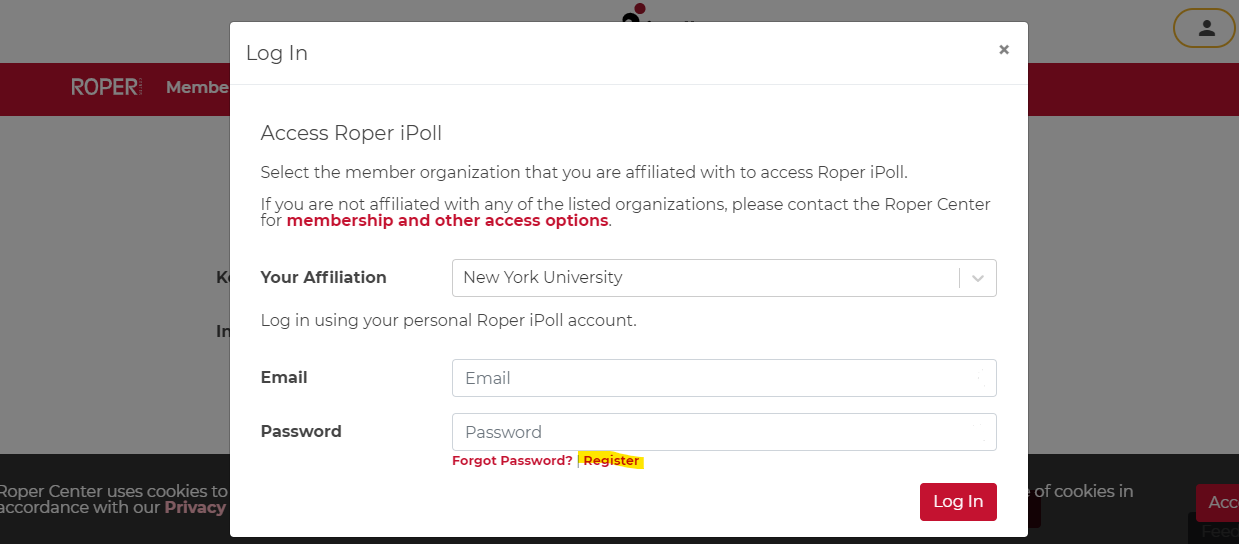

Enter your NYU email address (highlighted in yellow below) and then click "Register".

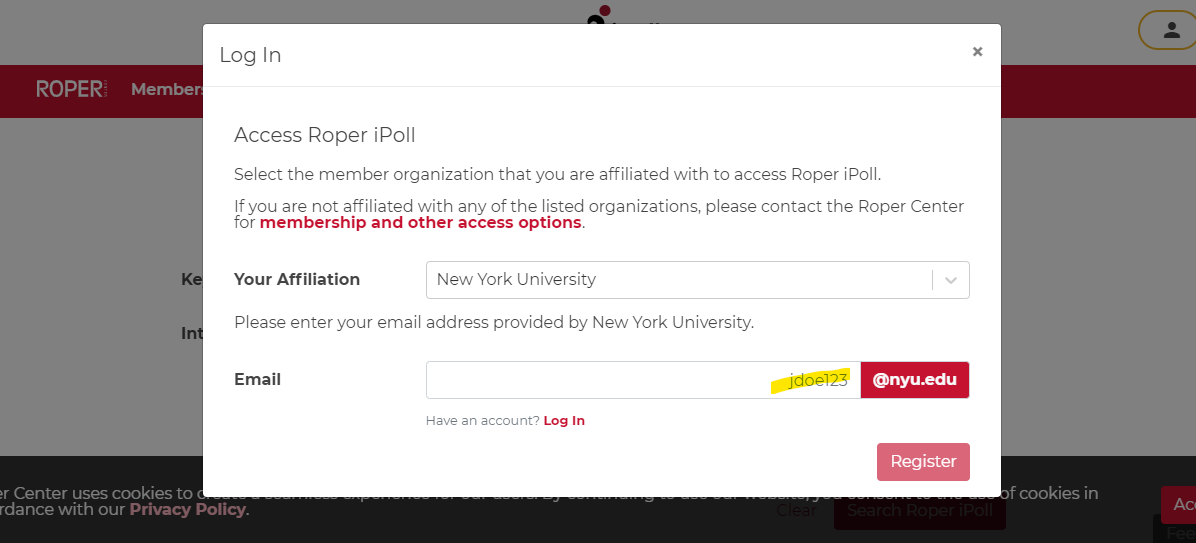

You will get an email at your NYU email address with the subject "Roper iPoll Account Registration". Open the email and click "Confirm Account" to create a password and finish your account registration.

Once you have completed your account registration, log in to Roper iPoll by clicking the user icon in the top right of the page, choosing "Log in", and entering your NYU email address and password.

Ethan Lehner nascent3

Then, open the Study Record for the [2016 National Election Day Exit Poll](https://ropercenter.cornell.edu/ipoll/study/31116396).

Click on the "Downloads" tab, and then click on the CSV data file (highlighted in the image below).

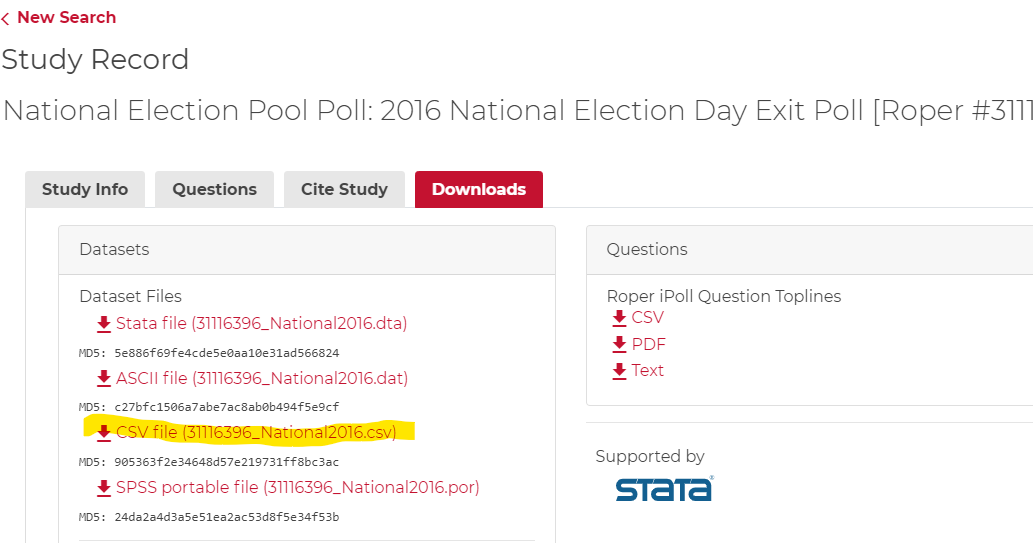

Accept the terms (click "Accept terms") and the file will be downloaded to your computer.

After you download the CSV file, scroll down a bit until you see the "Study Documentation, Questionnaire and Codebooks" PDF file. Download this file as well.

To get the data into Colab, run the following cell. Upload the CSV file you just downloaded (`31116396_National2016.csv`) to your Colab workspace. Wait until the uploaded has **completely** finished - it may take a while, depending on the quality of your network connection.


Then, use the `read_csv` function in `pandas` to read in the file. 

Also use `head` to view the first few rows of data and make sure that everything is read in correctly.

In [132]:
df = pd.read_csv('31116396_National2016.csv')
df.head()

D:\Users\Ray\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,PRES,HOU,WEIGHT,@2WAYPRES16,AGE,AGE3,AGE8,AGE45,AGE49,AGE60,AGE65,AGEBLACK,AGEBYRACE,AGEBYRACE08,ATTEND16,ATTEND16B,ATTREL,BACKSIDE,BORNCITIZEN,BREAK12,BREAK12A,BREAK12B,BRNAGAIN,CALL,CDNUM,CHIEF16,CLINHONEST,CLINTONEMAIL,CLINTONEMAILB,CLINTONWINGEN,CLINTONWINGENB,COUNT2,COUNTACC,CUBAN3,DESCRIBP12,EDUC12R,EDUCCOLL,EDUCHS,EDUCWHITE,EDUCWHITEBYSEX,FAIRJUSTICE,FAVDEM2,FAVHCLIN16,FAVPRES16,FAVREP2,FAVTRUMP,FINSIT,FTVOTER,GOVTANGR16,GOVTANGR16B,GOVTDO10,HANDLEECON16,HANDLEFP16,HEALTHCARE16,HONEST16,IMMDEPORT,IMMWALL,INC100K,INC50K,INCOME3,INCOME16GEN,INCWHITE,ISIS16,ISIS16B,ISSUE16,LATINO,LGBT,LIFE,MARRIED,MORMON,NEC,NEC2,OBAMA2,OBAMA4,OBAMAPLCY16,OVER45,OVER65,PARTY,PARTYBLACK,PARTYBYRACE,PARTYGENDER,PARTYID,PARTYWHITE,PHIL3,PRECINCT,PTYIDEO,PTYIDEO7,QLT16,QRACE3,QRACEAI,QRACEAK,QRACEHI,QTYPE,QUALCLINTON,QUALIFIED16,QUALTRUMP,RACE,RACE2B,RACEAI,REGION,REL4,REL5,RELIGN10,RELWHITE,SEX,SEXBYRACE,SEXWED,SIZEPLAC,SIZEPLC3,SPANISHQ,SPLITTICKET,STANUM,SUBURBWHITE,SUPREME16,SUPREME16B,TELEPOLL,TEMPCLINTON,TEMPERAMENT16,TEMPTRUMP,TIME16,TIME16MONTH,TIME16WEEK,TRACK,TRADE16,TRUMPHONEST,TRUMPWINGEN,TRUMPWINGENB,TRUMPWOMEN,TRUMPWOMENB,UNIONHH12,VERSION,VETVOTER,WHITEREL,WHNCLINC,WHTEVANG,WPROTBRN,WPROTBRN3
0,135355,Hillary Clinton,The Democratic candidate,6.530935,,18-29,18-29,18-24,18-44,18-49,18-29,18-24,Non-Black 18-29,Latino 18-29,Latino 18-29,,,,Complete,,,,,,,30,,,,,,,,,,,Some college/assoc. degree,No college degree,More than High school graduate,Non white no college degree,Non-whites,,,Favorable,Only Hillary Clinton,,Unfavorable,,,,,,,,,,,,Less than 100k,Less than 50k,Less than 50 thousand,"Under $30,000","Under $50,000 and non white",,,Foreign policy,Yes,,,Yes,,,,Approve,Somewhat approve,,18-44,18-64,Democrat,Non-black Democrat,Latino Democrat,Democratic women,Democrat,Non-White Democrats,Liberal,,Liberal Democrats,Liberal Democrats,Has good judgment,Other,Hispanic/Latino,,,National questionnaire,,,,Hispanic/Latino,Non-white,Hispanic/Latino,West,,,,,Female,Latino women,Married women,Suburbs,Suburbs,English,,California,Other,,,Telephone survey,,,,In October,In the last month,Before that,,,,,,,,,Version 1,,,No,,,
1,135356,Hillary Clinton,The Democratic candidate,6.479016,,18-29,18-29,25-29,18-44,18-49,18-29,25-29,Non-Black 18-29,Latino 18-29,Latino 18-29,,,,Complete,,,,,,,44,,,,,,,,,,,College graduate,College graduate,More than High school graduate,Non white college degree,Non-whites,,,Favorable,Only Hillary Clinton,,Unfavorable,,,,,,,,,,,,Less than 100k,Less than 50k,Less than 50 thousand,"$30,000-$49,999","Under $50,000 and non white",,,The economy,Yes,,,Yes,,,,Approve,Somewhat approve,,18-44,18-64,Democrat,Non-black Democrat,Latino Democrat,Democratic men,Democrat,Non-White Democrats,Conservative,,Moderate/Conservative Democrats,Mod/Conserv. Democrats,Can bring needed change,Other,Hispanic/Latino,,,National questionnaire,,,,Hispanic/Latino,Non-white,Hispanic/Latino,West,,,,,Male,Latino men,Married men,Suburbs,Suburbs,English,,California,Other,,,Telephone survey,,,,In October,In the last month,Before that,,,,,,,,,Version 1,,,No,,,
2,135357,Hillary Clinton,The Democratic candidate,8.493230,,30-44,30-59,30-39,18-44,18-49,30-44,30-39,Non-Black 30-44,All others,All others,,,,Complete,,,,,,,6,,,,,,,,,,,College graduate,College graduate,More than High school graduate,Non white college degree,Non-whites,,,Unfavorable,Neither,,Unfavorable,,,,,,,,,,,,Less than 100k,50k or more,50 to 100 thousand,"$50,000-$99,999","Over $50,000 and non white",,,Foreign policy,No,,,Yes,,,,Approve,Strongly approve,,18-44,18-64,Independent/Something else,Non-black non-Democrat,All Other,Independent men,Independent,All others,Liberal,,Moderate/Liberal Republicans,Liberal Independents,Has the right experience,Other,Asian,,,National questionnaire,,,,Asian,Non-white,Asian,West,,,,,Male,All other races,Married men,"Cities 50,000-500,000","Cities over 50,000",English,,California,Other,,,Telephone survey,,,,In September,Before that,Before that,,,,,,,,,Version 1,,,No,

## Prepare data

Survey data can be tricky to work with, because surveys often "branch"; the questions that are asked depends on a respondent's answers to other questions.

In this case, different respondents fill out different versions of the survey. 




Review pages 7-11 of the "Study Documentation, Questionnaire, and Codebooks" PDF file you downloaded earlier, which shows the five different questionnaire versions used for the 2016 exit polls. 



![Exit poll versions](https://raw.githubusercontent.com/ffund/ml-notebooks/master/notebooks/images/exit-poll-survey-versions.png)

In [133]:
df['VERSION'].value_counts()

Version 2    5126
Version 1    5094
Version 3    4980
Version 4    4919
Version 5    4915
Name: VERSION, dtype: int64

In a red box next to each question, you can also see the name of the variable (column name) that the respondent's answer will be stored in.

Because each respondent answers different questions, for each row in the data, only some of the columns - the columns corresponding to questions included in that version of the survey - have data.

### Missing data

Since each respondent only saw a subset of questions, we expect to see missing values in each column.

However, if we look at the **count** of values in each column, we see that there are no missing values - every column has the full count!

In [134]:
df.describe(include='all')

,ID,PRES,HOU,WEIGHT,@2WAYPRES16,AGE,AGE3,AGE8,AGE45,AGE49,AGE60,AGE65,AGEBLACK,AGEBYRACE,AGEBYRACE08,ATTEND16,ATTEND16B,ATTREL,BACKSIDE,BORNCITIZEN,BREAK12,BREAK12A,BREAK12B,BRNAGAIN,CALL,CDNUM,CHIEF16,CLINHONEST,CLINTONEMAIL,CLINTONEMAILB,CLINTONWINGEN,CLINTONWINGENB,COUNT2,COUNTACC,CUBAN3,DESCRIBP12,EDUC12R,EDUCCOLL,EDUCHS,EDUCWHITE,EDUCWHITEBYSEX,FAIRJUSTICE,FAVDEM2,FAVHCLIN16,FAVPRES16,FAVREP2,FAVTRUMP,FINSIT,FTVOTER,GOVTANGR16,GOVTANGR16B,GOVTDO10,HANDLEECON16,HANDLEFP16,HEALTHCARE16,HONEST16,IMMDEPORT,IMMWALL,INC100K,INC50K,INCOME3,INCOME16GEN,INCWHITE,ISIS16,ISIS16B,ISSUE16,LATINO,LGBT,LIFE,MARRIED,MORMON,NEC,NEC2,OBAMA2,OBAMA4,OBAMAPLCY16,OVER45,OVER65,PARTY,PARTYBLACK,PARTYBYRACE,PARTYGENDER,PARTYID,PARTYWHITE,PHIL3,PRECINCT,PTYIDEO,PTYIDEO7,QLT16,QRACE3,QRACEAI,QRACEAK,QRACEHI,QTYPE,QUALCLINTON,QUALIFIED16,QUALTRUMP,RACE,RACE2B,RACEAI,REGION,REL4,REL5,RELIGN10,RELWHITE,SEX,SEXBYRACE,SEXWED,SIZEPLAC,SIZEPLC3,SPANISHQ,SPLITTICKET,STANUM,SUBURBWHITE,SUPREME16,SUPREME16B,TELEPOLL,TEMPCLINTON,TEMPERAMENT16,TEMPTRUMP,TIME16,TIME16MONTH,TIME16WEEK,TRACK,TRADE16,TRUMPHONEST,TRUMPWINGEN,TRUMPWINGENB,TRUMPWOMEN,TRUMPWOMENB,UNIONHH12,VERSION,VETVOTER,WHITEREL,WHNCLINC,WHTEVANG,WPROTBRN,WPROTBRN3
count,25034.000000,25034,25034,25034.000000,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034.000000,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034,25034
unique,NaN,7,5,NaN,5,5,4,9,3,3,5,7,9,14,14,5,3,6,2,3,6,4,4,3,4,NaN,4,4,6,4,6,4,4,6,4,5,5,3,3,5,6,4,4,4,6,4,4,5,3,6,4,4,4,4,5,6,4,4,3,3,4,7,5,6,4,6,3,3,5,3,3,6,4,4,6,5,3,3,4,5,9,7,5,6,4,240,6,8,6,4,7,7,7,1,4,6,4,6,3,7,4,5,6,9,6,3,8,5,5,3,3,6,51,4,6,4,2,4,6,4,7,4,4,4,5,4,6,4,6,4,3,5,3,7,3,3,3,4
top,NaN,Hillary Clinton,The Democratic candidate,NaN,,45-65,30-59,50-59,45+,18-49,45-59,50-64,Non-Black 45-59,White 60+,White 45-64,,,,Complete,,,,,,Call 1,NaN,,,,,,,,,,,Some college/assoc. degree,No college degree,More than High school graduate,White college degree,Non-whites,,,,,,,,,,,,,,,,,,,,,,,,,,No,,,,,,,,,,45+,18-64,Democrat,Non-black non-Democrat,All Republicans,Democratic women,Democrat,White Republican,Moderate,,Moderate/Liberal Republicans,Conservative Republicans,,White,White,,,National questionnaire,,,,White,White,White,South,,,,,Female,White women,,Suburbs,Suburbs,,,California,Other,,,Election day exit poll,,,,,,,,,,,,,,,Version 2,,,,,,
freq,NaN,12126,12041,NaN,15568,9746,13697,5071,14436,12836,7490,7327,6438,5562,7050,20387,20387,20894,24253,20164,20786,20786,20786,20284,7143,NaN,20251,20058,20284,20284,20251,20251,20284,20284,23788,20058,7835,11959,19783,8812,6744,20201,20251,20123,20123,20251,20123,20251,19975,19908,19908,20201,20115,20115,20201,20058,20201,20251,15783,15783,15783,15783,15885,20251,20251,15147,18984,20425,20054,15393,16656,20058,20058,20123,20123,20201,14436,20163,9230,13727,7580,5890,9230,6723,9399,4374,6747,4800,15147,17536,17617,24770,24703,25034,20201,20201,20201,17536,17536,14800,7246,16656,16656,16656,19142,13742,9491,15409,11966,11966,17385,11812,2559,16333,20119,20119,20660,20058,20058,20058,20123,20123,20123,20284,20054,20058,20251,20251,20284,20284,20324,5126,20387,16441,15521,20137,20503,22181
mean,188663.858712,NaN,NaN,1.003016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.672246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

This is because missing values are recorded as a single space, and not with a NaN. 

Let's change that:

In [135]:
df.replace(" ", float("NaN"), inplace=True)

Now we can see an accurate count of the number of responses in each column: 

In [136]:
df.describe(include='all')

,ID,PRES,HOU,WEIGHT,@2WAYPRES16,AGE,AGE3,AGE8,AGE45,AGE49,AGE60,AGE65,AGEBLACK,AGEBYRACE,AGEBYRACE08,ATTEND16,ATTEND16B,ATTREL,BACKSIDE,BORNCITIZEN,BREAK12,BREAK12A,BREAK12B,BRNAGAIN,CALL,CDNUM,CHIEF16,CLINHONEST,CLINTONEMAIL,CLINTONEMAILB,CLINTONWINGEN,CLINTONWINGENB,COUNT2,COUNTACC,CUBAN3,DESCRIBP12,EDUC12R,EDUCCOLL,EDUCHS,EDUCWHITE,EDUCWHITEBYSEX,FAIRJUSTICE,FAVDEM2,FAVHCLIN16,FAVPRES16,FAVREP2,FAVTRUMP,FINSIT,FTVOTER,GOVTANGR16,GOVTANGR16B,GOVTDO10,HANDLEECON16,HANDLEFP16,HEALTHCARE16,HONEST16,IMMDEPORT,IMMWALL,INC100K,INC50K,INCOME3,INCOME16GEN,INCWHITE,ISIS16,ISIS16B,ISSUE16,LATINO,LGBT,LIFE,MARRIED,MORMON,NEC,NEC2,OBAMA2,OBAMA4,OBAMAPLCY16,OVER45,OVER65,PARTY,PARTYBLACK,PARTYBYRACE,PARTYGENDER,PARTYID,PARTYWHITE,PHIL3,PRECINCT,PTYIDEO,PTYIDEO7,QLT16,QRACE3,QRACEAI,QRACEAK,QRACEHI,QTYPE,QUALCLINTON,QUALIFIED16,QUALTRUMP,RACE,RACE2B,RACEAI,REGION,REL4,REL5,RELIGN10,RELWHITE,SEX,SEXBYRACE,SEXWED,SIZEPLAC,SIZEPLC3,SPANISHQ,SPLITTICKET,STANUM,SUBURBWHITE,SUPREME16,SUPREME16B,TELEPOLL,TEMPCLINTON,TEMPERAMENT16,TEMPTRUMP,TIME16,TIME16MONTH,TIME16WEEK,TRACK,TRADE16,TRUMPHONEST,TRUMPWINGEN,TRUMPWINGENB,TRUMPWOMEN,TRUMPWOMENB,UNIONHH12,VERSION,VETVOTER,WHITEREL,WHNCLINC,WHTEVANG,WPROTBRN,WPROTBRN3
count,25034.000000,24696,23970,25034.000000,9466,24853,24853,24853,24853,24853,24853,24853,24549,24549,24549,4647,4647,4140,25034,4870,4248,4248,4248,4750,20660,25034.000000,4783,4976,4750,4750,4783,4783,4750,4750,1246,4976,23907,23907,23907,23615,23600,4833,4783,4911,4911,4783,4911,4783,5059,5126,5126,4833,4919,4919,4833,4976,4833,4783,9251,9251,9251,9251,9149,4783,4783,9887,21156,4609,4980,9641,8378,4976,4976,4911,4911,4833,24853,24853,23844,23550,23550,23802,23844,23550,23331,20660.0,23144,23144,9887,24671,23994,264,331,25034,4833,4833,4833,24671,24671,20829,25034,8378,8378,8378,5892,24974,24632,9625,25034,25034,7649,13222,25034,24818,4915,4915,25034,4976,4976,4976,4911,4911,4911,4750,4980,4976,4783,4783,4750,4750,4710,25034,4647,8593,9513,4897,4531,2853
unique,NaN,6,4,NaN,4,4,3,8,2,2,4,6,8,13,13,4,2,5,2,2,5,3,3,2,3,NaN,3,3,5,3,5,3,3,5,3,4,4,2,2,4,5,3,3,3,5,3,3,4,2,5,3,3,3,3,4,5,3,3,2,2,3,6,4,5,3,5,2,2,4,2,2,5,3,3,5,4,2,2,3,4,8,6,4,5,3,239.0,5,7,5,3,6,6,6,1,3,5,3,5,2,6,4,4,5,8,5,2,7,4,5,3,2,5,51,3,5,3,2,3,5,3,6,3,3,3,4,3,5,3,5,3,2,5,2,6,2,2,2,3
top,NaN,Hillary Clinton,The Democratic candidate,NaN,Hillary Clinton,45-65,30-59,50-59,45+,18-49,45-59,50-64,Non-Black 45-59,White 60+,White 45-64,Once a week or more,A few times a year or less,All others,Complete,Yes,An important factor,Important,Factor,No,Call 1,NaN,Hillary Clinton,No,A lot,A lot or some,Scared,Concerned or scared,Very confident or somewhat confident,Very confident,No,I strongly favor my candidate,Some college/assoc. degree,No college degree,More than High school graduate,White college degree,Non-whites,Treats blacks unfairly,Unfavorable,Unfavorable,Only Hillary Clinton,Unfavorable,Unfavorable,About the same,No,"Dissatisfied, but not angry","Dissatisfied, but not angry or Angry",Government is doing too many things better lef...,Hillary Clinton,Hillary Clinton,Went too far,Only Hillary Clinton,Offered a chance to apply for legal status,Oppose,Less than 100k,50k or more,Less than 50 thousand,"$50,000-$99,999","Over $50,000 and white",Somewhat well,Somewhat badly or very badly,The economy,No,No,Better than life today,Yes,Not a mormon,Not so good,Not so good or poor,Approve,Strongly approve,Change to more conservative policies,45+,18-64,Democrat,Non-black non-Democrat,All Republicans,Democratic women,Democrat,White Republican,Moderate,25.0,Moderate/Liberal Republicans,Conservative Republicans,Can bring needed change,White,White,White,Asian,National questionnaire,Yes,Only Hillary Clinton,No,White,White,White,South,"Protestant, Catholic or other Christian",Protestant/Other Non-Catholic Christian,Other christian,Protestant/Other Non-Catholic Christian,Female,White women,Married women,Suburbs,Suburbs,English,Democratic Senate - voted Clinton,California,Other,An important factor,The 

Notice that *every* row has some missing data! So, we can't just remove rows with missing data and work with the complete data.

Instead, we'll have to make sure that the classifier we use is able to work with partial data. One important benefit of K nearest neighbors is that it can work well with data that has missing values, as long as we can think of a distance metric that behaves reasonably under these conditions.

### Encode target variable as a binary variable

Our goal is to classify voters based on their vote in the 2016 presidential election, i.e. the value of the `PRES` column. We will restrict our attention to the candidates from the two major parties, so we will throw out the rows representing voters who chose other candidates:

In [137]:
df = df[df['PRES'].isin(['Donald Trump', 'Hillary Clinton'])]
df.reset_index(inplace=True, drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22798 entries, 0 to 22797
Columns: 138 entries, ID to WPROTBRN3
dtypes: float64(1), int64(2), object(135)
memory usage: 24.0+ MB


In [138]:
df.head()

,ID,PRES,HOU,WEIGHT,@2WAYPRES16,AGE,AGE3,AGE8,AGE45,AGE49,AGE60,AGE65,AGEBLACK,AGEBYRACE,AGEBYRACE08,ATTEND16,ATTEND16B,ATTREL,BACKSIDE,BORNCITIZEN,BREAK12,BREAK12A,BREAK12B,BRNAGAIN,CALL,CDNUM,CHIEF16,CLINHONEST,CLINTONEMAIL,CLINTONEMAILB,CLINTONWINGEN,CLINTONWINGENB,COUNT2,COUNTACC,CUBAN3,DESCRIBP12,EDUC12R,EDUCCOLL,EDUCHS,EDUCWHITE,EDUCWHITEBYSEX,FAIRJUSTICE,FAVDEM2,FAVHCLIN16,FAVPRES16,FAVREP2,FAVTRUMP,FINSIT,FTVOTER,GOVTANGR16,GOVTANGR16B,GOVTDO10,HANDLEECON16,HANDLEFP16,HEALTHCARE16,HONEST16,IMMDEPORT,IMMWALL,INC100K,INC50K,INCOME3,INCOME16GEN,INCWHITE,ISIS16,ISIS16B,ISSUE16,LATINO,LGBT,LIFE,MARRIED,MORMON,NEC,NEC2,OBAMA2,OBAMA4,OBAMAPLCY16,OVER45,OVER65,PARTY,PARTYBLACK,PARTYBYRACE,PARTYGENDER,PARTYID,PARTYWHITE,PHIL3,PRECINCT,PTYIDEO,PTYIDEO7,QLT16,QRACE3,QRACEAI,QRACEAK,QRACEHI,QTYPE,QUALCLINTON,QUALIFIED16,QUALTRUMP,RACE,RACE2B,RACEAI,REGION,REL4,REL5,RELIGN10,RELWHITE,SEX,SEXBYRACE,SEXWED,SIZEPLAC,SIZEPLC3,SPANISHQ,SPLITTICKET,STANUM,SUBURBWHITE,SUPREME16,SUPREME16B,TELEPOLL,TEMPCLINTON,TEMPERAMENT16,TEMPTRUMP,TIME16,TIME16MONTH,TIME16WEEK,TRACK,TRADE16,TRUMPHONEST,TRUMPWINGEN,TRUMPWINGENB,TRUMPWOMEN,TRUMPWOMENB,UNIONHH12,VERSION,VETVOTER,WHITEREL,WHNCLINC,WHTEVANG,WPROTBRN,WPROTBRN3
0,135355,Hillary Clinton,The Democratic candidate,6.530935,NaN,18-29,18-29,18-24,18-44,18-49,18-29,18-24,Non-Black 18-29,Latino 18-29,Latino 18-29,NaN,NaN,NaN,Complete,NaN,NaN,NaN,NaN,NaN,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Some college/assoc. degree,No college degree,More than High school graduate,Non white no college degree,Non-whites,NaN,NaN,Favorable,Only Hillary Clinton,NaN,Unfavorable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less than 100k,Less than 50k,Less than 50 thousand,"Under $30,000","Under $50,000 and non white",NaN,NaN,Foreign policy,Yes,NaN,NaN,Yes,NaN,NaN,NaN,Approve,Somewhat approve,NaN,18-44,18-64,Democrat,Non-black Democrat,Latino Democrat,Democratic women,Democrat,Non-White Democrats,Liberal,NaN,Liberal Democrats,Liberal Democrats,Has good judgment,Other,Hispanic/Latino,NaN,NaN,National questionnaire,NaN,NaN,NaN,Hispanic/Latino,Non-white,Hispanic/Latino,West,NaN,NaN,NaN,NaN,Female,Latino women,Married women,Suburbs,Suburbs,English,NaN,California,Other,NaN,NaN,Telephone survey,NaN,NaN,NaN,In October,In the last month,Before that,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Version 1,NaN,NaN,No,NaN,NaN,NaN
1,135356,Hillary Clinton,The Democratic candidate,6.479016,NaN,18-29,18-29,25-29,18-44,18-49,18-29,25-29,Non-Black 18-29,Latino 18-29,Latino 18-29,NaN,NaN,NaN,Complete,NaN,NaN,NaN,NaN,NaN,NaN,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,College graduate,College graduate,More than High school graduate,Non white college degree,Non-whites,NaN,NaN,Favorable,Only Hillary Clinton,NaN,Unfavorable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less than 100k,Less than 50k,Less than 50 thousand,"$30,000-$49,999","Under $50,000 and non white",NaN,NaN,The economy,Yes,NaN,NaN,Yes,NaN,NaN,NaN,Approve,Somewhat approve,NaN,18-44,18-64,Democrat,Non-black Democrat,Latino Democrat,Democratic men,Democrat,Non-White Democrats,Conservative,NaN,Moderate/Conservative Democrats,Mod/Conserv. Democrats,Can bring needed change,Other,Hispanic/Latino,NaN,NaN,National questionnaire,NaN,NaN,NaN,Hispanic/Latino,Non-white,Hispanic/Latino,West,NaN,NaN,NaN,NaN,Male,Latino men,Married men,Suburbs,Suburbs,English,NaN,California,Other,NaN,NaN,Telephone survey,NaN,NaN,NaN,In October,In the last month,Before that,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Version 1,NaN,NaN,No,NaN,NaN,NaN
2,135357,Hillary Clinton,The Democratic candidate,8.493230,NaN,30-44,30-59,30-39,18-44,18-49,30-44,30-39,Non-Black 30-44,All others,All others,NaN,NaN,NaN,Complete,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,College graduate,College graduate,More than High school graduate,Non white college degree,Non-whites,NaN,NaN,Unfavorable,Neither,NaN,Unfavorable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less than 100k,50k or more,50 to 100 thousand,"$50,000-$99,999","Over $5

In [139]:
df['PRES'].value_counts()

Hillary Clinton    12126
Donald Trump       10672
Name: PRES, dtype: int64

Now, we will transform the string value into a binary variable, and save the result in `y`.

In [140]:
y = df['PRES'].map({'Donald Trump': 1, 'Hillary Clinton': 0}) 
y.value_counts()

0    12126
1    10672
Name: PRES, dtype: int64

### Get training and test indices

We'll be working with many different subsets of this dataset, including different columns. 

So instead of splitting up the data into training and test sets, we'll get an array of training indices and an array of test indices using `ShuffleSplit`. Then, we can use these arrays throughout this notebook.

In [141]:
idx_tr, idx_ts = next(ShuffleSplit(n_splits = 1, test_size = 0.3, random_state = 3).split(df['PRES']))

I specified the state of the random number generator for repeatability, so that every time we run this notebook we'll have the same split. This makes it easier to discuss specific examples.

Now, we can use the `pandas` function `.iloc` to get the training and test parts of the data set for any column.


For example, if we want the training subset of `y`:

In [142]:
y.iloc[idx_tr]

1349     1
14642    0
18106    0
19171    1
17962    0
        ..
6400     1
15288    0
11513    0
1688     1
5994     0
Name: PRES, Length: 15958, dtype: int64

or the test subset of `y`:

In [143]:
y.iloc[idx_ts]

21876    1
17297    0
19295    0
8826     1
11357    0
        ..
9144     0
4409     0
6320     0
7824     0
4012     1
Name: PRES, Length: 6840, dtype: int64

### Encode ordinal features

Next, we need to encode our features. All of the features are represented as strings, but we will have to transform them into something over which we can compute a meaningful distance measure.

Columns that have a logical order should be encoded using ordinal encoding, so that the distance metric will be meaningful.

For example, consider the `AGE` column:

In [144]:
df['AGE'].unique()

array(['18-29', '30-44', '45-65', '65+', nan], dtype=object)

In [145]:
df['AGE'].value_counts()

45-65    9067
30-44    5526
65+      4398
18-29    3649
Name: AGE, dtype: int64

What if we transform the `AGE` column using four binary columns: `AGE_18-29`, `AGE_30-44`, `AGE_45-65`, `AGE_65+`, with a 0 or a 1 in each column to indicate the respondent's age?

If we did this, we would lose meaningful information about the distance between ages; a respondent whose age is 18-29 would have the same distance to one whose age is 45-65 as to one whose age is 65+.

Instead, we will use ordinal encoding, which will represent `AGE` in a single column with *ordered* integer values.

First, we create an `OrdinalEncoder`:

In [146]:
enc_ord = ce.OrdinalEncoder(handle_missing='return_nan')

Then, we `fit` it by passing the columns that we wish to encode as ordinal values:

In [147]:
enc_ord.fit(df['AGE'])

OrdinalEncoder(cols=['AGE'], drop_invariant=False, handle_missing='return_nan',
               handle_unknown='value',
               mapping=[{'col': 'AGE', 'data_type': dtype('O'),
                         'mapping': 18-29    1
30-44    2
45-65    3
65+      4
NaN     -2
dtype: int64}],
               return_df=True, verbose=0)

Finally, we use the "fitted" encoder to `transform` the data, and we save the result in `df_enc_ord`.

In [148]:
df_enc_ord = enc_ord.transform(df['AGE'])
df_enc_ord['AGE'].value_counts()

3.0    9067
2.0    5526
4.0    4398
1.0    3649
Name: AGE, dtype: int64

We can pass more than one feature to our encoder, and it will encode all features. For example, let us consider the column `EDUC12R`, which includes the respondent's answer to the question:

> Which best describes your education?
> 
> 1. High school or less
> 2. Some college/assoc. degree
> 3. College graduate
> 4. Postgraduate study

In [149]:
df['EDUC12R'].value_counts()

Some college/assoc. degree    7134
College graduate              6747
Postgraduate study            4071
High school or less           3846
Name: EDUC12R, dtype: int64

We can try to fit the encoder using both `AGE` and `EDUC12R`:

In [150]:
features = ['EDUC12R', 'AGE']

enc_ord = ce.OrdinalEncoder(handle_missing='return_nan')
enc_ord.fit(df[features])

OrdinalEncoder(cols=['EDUC12R', 'AGE'], drop_invariant=False,
               handle_missing='return_nan', handle_unknown='value',
               mapping=[{'col': 'EDUC12R', 'data_type': dtype('O'),
                         'mapping': Some college/assoc. degree    1
College graduate              2
Postgraduate study            3
High school or less           4
NaN                          -2
dtype: int64},
                        {'col': 'AGE', 'data_type': dtype('O'),
                         'mapping': 18-29    1
30-44    2
45-65    3
65+      4
NaN     -2
dtype: int64}],
               return_df=True, verbose=0)

For this column, the order that the encoder "guesses" is not the desired order - the "High school or less" answer should have the smallest value, followed by "Some college/assoc. degree", then "College graduate", then "Postgraduate study".

To address this, we will pass a dictionary that tells the encoder exactly how to map these columns so that they are in the desired order:

In [151]:
mapping_dict = {'col': 'AGE', 'mapping': 
                {'18-29': 1, 
                 '30-44': 2,
                 '45-65': 3,
                 '65+': 4}
                }, {'col': 'EDUC12R', 'mapping':  
                  {'High school or less': 1,
                   'Some college/assoc. degree': 2,
                   'College graduate': 3,
                   'Postgraduate study': 4}
                    }

features = ['EDUC12R', 'AGE']

enc_ord = ce.OrdinalEncoder(handle_missing='return_nan', mapping=mapping_dict)
enc_ord.fit(df[features])

OrdinalEncoder(cols=['EDUC12R', 'AGE'], drop_invariant=False,
               handle_missing='return_nan', handle_unknown='value',
               mapping=({'col': 'AGE',
                         'mapping': {'18-29': 1, '30-44': 2, '45-65': 3,
                                     '65+': 4}},
                        {'col': 'EDUC12R',
                         'mapping': {'College graduate': 3,
                                     'High school or less': 1,
                                     'Postgraduate study': 4,
                                     'Some college/assoc. degree': 2}}),
               return_df=True, verbose=0)

(Note: for certain features, some rows may have an "Omit" value. These should be mapped to -1, which we will convert to NaN later.)

Then, we can get the encoded version of these columns:

In [152]:
df_enc_ord = enc_ord.transform(df[features])

In [153]:
df_enc_ord['AGE'].value_counts()

 3.0    9067
 2.0    5526
 4.0    4398
 1.0    3649
-1.0     158
Name: AGE, dtype: int64

In [154]:
df_enc_ord['EDUC12R'].value_counts()

 2.0    7134
 3.0    6747
 4.0    4071
 1.0    3846
-1.0    1000
Name: EDUC12R, dtype: int64

Missing values were encoded as -1, which we can transform back to NaN:

In [155]:
df_enc_ord.replace(-1, float("NaN"), inplace=True)
df_enc_ord.isna().sum()

EDUC12R    1000
AGE         158
dtype: int64

Note that the values in the encoded columns range from 1 to the number of categories.

For K nearest neighbors, the "importance" of each feature in determining the class label would be proportional to its scale. If we leave it as is, any feature with a larger range of possible values will be considered more "important!"

So, we will re-scale our encoded features to the unit interval:

In [156]:
for col in df_enc_ord.columns:
  df_enc_ord[col] = df_enc_ord[col]-df_enc_ord[col].min(skipna=True)
  df_enc_ord[col] = df_enc_ord[col]/df_enc_ord[col].max(skipna=True)

In [157]:
df_enc_ord.describe()

,EDUC12R,AGE
count,21798.000000,22640.000000
mean,0.502202,0.542609
std,0.329376,0.323963
min,0.000000,0.000000
25%,0.333333,0.333333
50%,0.333333,0.666667
75%,0.666667,0.666667
max,1.000000,1.000000


Now, each feature is on the same scale - the value varies 0 to 1.

### Encode categorical features

In the previous section, we encoded features that have a logical ordering.

Other categorical features, such as `RACE`, have no logical ordering. 

In [158]:
df['RACE'].value_counts()

White              15918
Black               2993
Hispanic/Latino     2210
Asian                686
Other                681
Name: RACE, dtype: int64

These should be encoded using one-hot encoding, which will create a new column for each unique value, and then put a 1 or 0 in each column to indicate the respondent's answer.

In [159]:
enc_oh = ce.OneHotEncoder(use_cat_names=True, handle_missing='return_nan')
enc_oh.fit(df['RACE'])

OneHotEncoder(cols=['RACE'], drop_invariant=False, handle_missing='return_nan',
              handle_unknown='value', return_df=True, use_cat_names=True,
              verbose=0)

In [160]:
df_enc_oh = enc_oh.transform(df['RACE'])

In [161]:
df_enc_oh

,RACE_Hispanic/Latino,RACE_Asian,RACE_Other,RACE_Black,RACE_White,RACE_nan
0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
22793,0.0,0.0,0.0,0.0,1.0,0.0
22794,0.0,0.0,0.0,1.0,0.0,0.0
22795,0.0,0.0,0.0,1.0,0.0,0.0
22796,0.0,0.0,0.0,0.0,1.0,0.0


Note that we have some respondents for which this feature is not available. These respondents have a NaN in all `RACE` columns:

In [162]:
df_enc_oh.isnull().sum()

RACE_Hispanic/Latino    310
RACE_Asian              310
RACE_Other              310
RACE_Black              310
RACE_White              310
RACE_nan                310
dtype: int64

So, we can drop the `RACE_nan` column.

(For certain columns, some rows may have an "Omit" value recorded. We would also drop `FEATURE_Omit` columns wherever they may occur, so that these will not be included in the distance computations.)

In [163]:
columns_to_drop = ['RACE_nan']
df_enc_oh.drop(columns_to_drop, axis=1, inplace=True)

In [164]:
df_enc_oh.head()

,RACE_Hispanic/Latino,RACE_Asian,RACE_Other,RACE_Black,RACE_White
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0


## Train a k nearest neighbors classifier

Now that we have a target variable, a couple of features, and training and test indices, let's see what happens if we try to train a K nearest neighbors classifier.

First, we'll prepare our feature data, by column-wise concatenating the ordinal-encoded feature columns and the one-hot-encoded feature columns:

In [165]:
X = pd.concat([df_enc_oh, df_enc_ord], axis=1)

Here are the summary statistics for the training data:

In [166]:
X.iloc[idx_tr].describe()

,RACE_Hispanic/Latino,RACE_Asian,RACE_Other,RACE_Black,RACE_White,EDUC12R,AGE
count,15744.000000,15744.000000,15744.000000,15744.000000,15744.000000,15261.000000,15846.000000
mean,0.097561,0.030043,0.031885,0.133067,0.707444,0.503396,0.541398
std,0.296730,0.170712,0.175700,0.339657,0.454951,0.329551,0.324832
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.333333,0.666667
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.666667,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


and for the test data:


In [167]:
X.iloc[idx_ts].describe()

,RACE_Hispanic/Latino,RACE_Asian,RACE_Other,RACE_Black,RACE_White,EDUC12R,AGE
count,6744.000000,6744.000000,6744.000000,6744.000000,6744.000000,6537.000000,6794.000000
mean,0.099941,0.031584,0.026542,0.133155,0.708778,0.499414,0.545432
std,0.299943,0.174902,0.160753,0.339768,0.454359,0.328976,0.321933
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.333333,0.666667
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.666667,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


This classifier will only use a few features, but we'll see how well we can do with those to start.

### Baseline: "prediction by mode"

As a baseline against which to judge the performance of our classifier, let's find out the accuracy of a classifier that gives the majority class label (0) to all samples in our test set:

In [168]:
accuracy_score(y.iloc[idx_ts], np.repeat(0, len(y.iloc[idx_ts])))

0.5321637426900585

A classifier trained on the data should do *at least* as well as the one that predicts the majority class label. Hopefully, we'll be able to do much better!

### `KNeighborsClassifier` does not support data with NaNs


If we try to train a `KNeighborsClassifier` on our data using the default settings, it will fail with the error message

```
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
```



Un-comment these lines, run the cell, and see for yourself:

In [169]:
#clf = KNeighborsClassifier(n_neighbors=3)
#clf.fit(X.iloc[idx_tr], y.iloc[idx_tr])

This is because we have many missing values in our data:

In [170]:
X.isna().sum()

RACE_Hispanic/Latino     310
RACE_Asian               310
RACE_Other               310
RACE_Black               310
RACE_White               310
EDUC12R                 1000
AGE                      158
dtype: int64

The distance metric is not defined for vectors with missing values.

### Writing our own `KNeighborsClassifier`

Although we cannot use the `sklearn` implementation of a `KNeighborsClassifier`, we can write our own. We need a few things:

* a function that implements a distance metric
* a function that accepts a distance matrix and returns the indices of the K smallest values for each row
* a function that returns the majority vote of the training samples represented by those indices

Let's start with the distance metric. Suppose we use an L1 distance computed over the features that are non-NaN for both samples:

In [171]:
def custom_distance(a, b):
  dif = np.abs(np.subtract(a,b))    # element-wise absolute difference
  # dif will have NaN for each element where either a or b is NaN
  l1 = np.nansum(dif**2, axis=1)  # sum of differences, treating NaN as 0
  return l1

The function above expects a vector for the first argument and a matrix for the second argument, and returns a vector. 

For example: suppose you pass a test point $x_t$ and a matrix of training samples where each row $x_0, \ldots, x_n$ is another training sample. It will return a vector $d_t$ with as many elements as there are training samples, and where the $i$th entry is the distance between the test point $x_t$ and training sample $x_i$.

To see how to this function is used, let's consider an example with a small number of test samples and training samples.

Suppose we had this set of test data:

In [172]:
a_idx = np.array([10296, 510,4827,20937, 22501])
a = X.iloc[a_idx]
a

,RACE_Hispanic/Latino,RACE_Asian,RACE_Other,RACE_Black,RACE_White,EDUC12R,AGE
10296,0.0,0.0,0.0,0.0,1.0,0.666667,0.666667
510,0.0,0.0,0.0,0.0,1.0,0.666667,1.000000
4827,0.0,0.0,0.0,0.0,1.0,0.333333,0.666667
20937,0.0,0.0,0.0,1.0,0.0,0.333333,0.333333
22501,NaN,NaN,NaN,NaN,NaN,1.000000,0.666667


and this set of training data:

In [173]:
b_idx = np.array([10379, 4343, 7359,  1028,  2266, 131, 11833, 14106,  6682,  4402, 11899,  5877, 11758, 13163])
b = X.iloc[b_idx]
b

,RACE_Hispanic/Latino,RACE_Asian,RACE_Other,RACE_Black,RACE_White,EDUC12R,AGE
10379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4343,0.0,1.0,0.0,0.0,0.0,0.666667,0.666667
7359,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000
1028,0.0,0.0,0.0,1.0,0.0,0.000000,1.000000
2266,0.0,0.0,0.0,0.0,1.0,0.666667,1.000000
131,NaN,NaN,NaN,NaN,NaN,0.666667,1.000000
11833,0.0,0.0,0.0,0.0,1.0,0.000000,1.000000
14106,0.0,0.0,0.0,0.0,1.0,0.666667,0.000000
6682,0.0,0.0,0.0,0.0,1.0,0.000000,1.000000
4402,0.0,0.0,0.0,0.0,1.0,0.666667,0.333333


We will set up a *distance matrix* in which to store the results. In the distance matrix, an entry in row $i$, column $j$ represents the distance between row $i$ of the test set and row $j$ of the training set. 

So the distance matrix should have as many rows as there are test samples, and as many columns as there are training samples.

In [174]:
distances_custom = np.zeros(shape=(len(a_idx), len(b_idx)))
distances_custom.shape

(5, 14)

Instead of a conventional `for` loop, we will use a [tqdm](https://github.com/tqdm/tqdm) `for` loop. This library conveniently "wraps" the conventional `for` loop with a progress part, so we can see our progress while the loop is running.

In [175]:
# the first argument to tqdm, range(len(a_idx)), is the list we are looping over
for idx in tqdm(range(len(a_idx)),  total=len(a_idx), desc="Distance matrix"):
  distances_custom[idx] = custom_distance(X.iloc[a_idx[idx]], X.iloc[b_idx])

Distance matrix: 100%|██████████| 5/5 [00:00<00:00, 714.63it/s]


In [176]:
np.set_printoptions(precision=2) # show at most 2 decimal places
print(distances_custom)

[[0.   2.   0.89 2.56 0.11 0.11 0.56 0.44 0.56 0.11 0.44 2.44 2.   2.  ]
 [0.   2.11 1.44 2.44 0.   0.   0.44 1.   0.44 0.44 0.56 3.   2.11 2.11]
 [0.   2.11 0.56 2.22 0.22 0.22 0.22 0.56 0.22 0.22 0.11 2.44 2.11 2.11]
 [0.   2.22 2.22 0.56 2.56 0.56 2.56 2.22 2.56 2.11 2.22 2.11 0.22 0.22]
 [0.   0.11 1.44 1.11 0.22 0.22 1.11 0.56 1.11 0.22 1.   0.44 0.11 0.11]]


Now, for each test sample, we can:

* get an array of indices from the *distance matrix*, sorted in order of increasing distance
* get the list of the K nearest neighbors as the first K elements from that list,
* and then from those entries - which are indices with respect to the distance matrix - get the corresponding indices in `X`:

In [177]:
k = 3
distances_sorted = np.array([np.argsort(row) for row in distances_custom])
nn_lists = distances_sorted[:, :k]
nn_lists_idx = b_idx[nn_lists]

For example, here was the first test sample:

In [178]:
X.iloc[[10296]]

,RACE_Hispanic/Latino,RACE_Asian,RACE_Other,RACE_Black,RACE_White,EDUC12R,AGE
10296,0.0,0.0,0.0,0.0,1.0,0.666667,0.666667


and here are its closest neighbors among the training samples:

In [179]:
X.iloc[nn_lists_idx[0]]

,RACE_Hispanic/Latino,RACE_Asian,RACE_Other,RACE_Black,RACE_White,EDUC12R,AGE
10379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4402,0.0,0.0,0.0,0.0,1.0,0.666667,0.333333
2266,0.0,0.0,0.0,0.0,1.0,0.666667,1.000000


their corresponding values in `y`:

In [180]:
y.iloc[nn_lists_idx[0]]

10379    1
4402     0
2266     0
Name: PRES, dtype: int64

and their distances:

In [181]:
distances_custom[0, nn_lists[0]]

array([0.  , 0.11, 0.11])

and so the predicted vote for the first test sample would be:


In [182]:
y.iloc[nn_lists_idx[0]].mode()

0    0
dtype: int64

You may have noticed a problem: training sample 10379, which has all NaN values, has zero distance to *every* test sample according to our distance function. (Note that the first column in the distance matrix, corresponding to the first training sample, is all zeros.)

This means that this sample will be a "nearest neighbor" of *every* test sample! But, it's not necessarily similar to those other test samples. We just *don't have any information* by which to judge how similar it is to other samples.

The case with an all-NaN training sample is a bit extreme, but it illustrates how our simple distance metric is problematic in other situations as well:

* If a sample has only NaN values for the features we decide to include, its distance to every other sample is 0 and it will be considered a "nearest neighbor" to everyone.
* If two samples have no non-NaN features in common - for example, if sample $a$ is NaN for every feature where sample $b$ is non-NaN - the distance between them will be 0, and they will be considered very similar, even though we just don't have any information by which to judge how similar they are.
* Even for samples that have non-NaN features in common, our distance metric is problematic because it doesn't care how much the two samples have in common - only how many features they disagree on.

For example, consider these two samples from the original data:

In [183]:
pd.set_option('display.max_columns', 150)
disp_features = ['AGE8', 'RACE', 'REGION', 'SEX', 'SIZEPLAC', 'STANUM', 'EDUC12R', 'EDUCCOLL','INCOME16GEN', 'ISSUE16', 'QLT16', 'VERSION']
df.iloc[[0,1889]][disp_features]

,AGE8,RACE,REGION,SEX,SIZEPLAC,STANUM,EDUC12R,EDUCCOLL,INCOME16GEN,ISSUE16,QLT16,VERSION
0,18-24,Hispanic/Latino,West,Female,Suburbs,California,Some college/assoc. degree,No college degree,"Under $30,000",Foreign policy,Has good judgment,Version 1
1889,NaN,NaN,West,Female,Suburbs,California,NaN,NaN,NaN,NaN,NaN,Version 3


These two samples have some things in common:

* female
* from suburban California

but we don't know much else about what they have in common or what they disagree on. 

Our distance metric will consider them very similar, because they are identical with respect to every feature that is available in both samples.




On the other hand, consider these two samples:

In [184]:
df.iloc[[0,14826]][disp_features]

,AGE8,RACE,REGION,SEX,SIZEPLAC,STANUM,EDUC12R,EDUCCOLL,INCOME16GEN,ISSUE16,QLT16,VERSION
0,18-24,Hispanic/Latino,West,Female,Suburbs,California,Some college/assoc. degree,No college degree,"Under $30,000",Foreign policy,Has good judgment,Version 1
14826,18-24,Hispanic/Latino,South,Female,Rural,Oklahoma,High school or less,No college degree,"Under $30,000",Foreign policy,Has good judgment,Version 2


These two samples have many more things in common: 

* female
* Latino 
* age 18-24 
* no college degree
* income less then $30,000
* consider foreign policy to be the major issue facing the country
* consider "Has good judgment" to be the most important quality in deciding their presidential vote. 

However, they also have some differences:

* some college/associate degree vs. high school education or less
* suburban California vs. rural Oklahoma

so the distance metric will consider them *less* similar than the previous pair.

### Using our K nearest neighbors classifier on the test data

Later, we'll have to fix those issues we identified with the custom distance metric, but for now, we will proceed without changing it.



Now that we understand how our custom distance function works, let's compute the distance between every *test* sample and every *training* sample. We'll store the results in `distances_custom`.

In [185]:
distances_custom = np.zeros(shape=(len(idx_ts), len(idx_tr)))
distances_custom.shape

(6840, 15958)

Loop over the indices in the *test* set that we set up earlier to compute the distance vector for each test sample:

In [186]:
for idx in tqdm(range(len(idx_ts)),  total=len(idx_ts), desc="Distance matrix"):
  distances_custom[idx] = custom_distance(X.iloc[idx_ts[idx]], X.iloc[idx_tr])

Distance matrix: 100%|██████████| 6840/6840 [00:33<00:00, 205.78it/s]


Then, we can compute the K nearest neighbors using those distances:

In [187]:
k = 3

# get nn indices in distance matrix
distances_sorted = np.array([np.argsort(row) for row in distances_custom]) 
nn_lists = distances_sorted[:, :k]

# get nn indices in training data matrix
nn_lists_idx = idx_tr[nn_lists]

# predict using mode of nns
y_pred =  [y.iloc[nn].mode()[0] for nn in nn_lists_idx]

In [188]:
accuracy_score(y.iloc[idx_ts], y_pred)

0.5419590643274854

This classifier seems to improve over the "prediction by mode" classifier! But, there is an important, fundamental issue that we should fix.

### Handling ties

If you look at the lists of nearest neighbors, you may notice something unexpected. Some training samples appear very frequently, even hundreds of times, among the K closest neighbors.

For example, here are the nearest neighbors for the first 50 test samples. Do you see any repetition?

In [189]:
print(nn_lists_idx[0:50])

[[22125 10395 11533]
 [ 4029 14376  9154]
 [18978 11588  3361]
 [18684  2099  1027]
 [21271  2887 10312]
 [15723 10538  1351]
 [10781  1381 13208]
 [ 7220 10615 21991]
 [18029 20065  1669]
 [ 2137  7114 21904]
 [ 8049 17354  8123]
 [12554  1275  9068]
 [21271  2887 10312]
 [18491  5402 17236]
 [12554 12518  7972]
 [10781  1381 13208]
 [12554 12518  7972]
 [10781  1381 13208]
 [19327  1205  1034]
 [18241  8047  8130]
 [21035 16766 20955]
 [19652 19090  8882]
 [ 1349  5942  7648]
 [10781  1381 13208]
 [ 1349  5942  7648]
 [21313  3884 13693]
 [ 8049 17354  8123]
 [18491  5402 17236]
 [19070 17858  2355]
 [19652 19090  8882]
 [18684  2099  1027]
 [ 1349  5942  7648]
 [10781  1381 13208]
 [15723 10538  1351]
 [11093 14081 21802]
 [18241  8047  8130]
 [10781  1381 13208]
 [13085 19765 14192]
 [10781  1381 13208]
 [ 1349  5942  7648]
 [ 1349  5942  7648]
 [18491  5402 17236]
 [ 1349 10056 17430]
 [ 8049 17354  8123]
 [19327  1205  1034]
 [10781  1381 13208]
 [19384 21526 20069]
 [  843   580

You might find that these three samples appear very often as nearest neighbors:

In [190]:
X.iloc[[876, 10379,  1883]]

,RACE_Hispanic/Latino,RACE_Asian,RACE_Other,RACE_Black,RACE_White,EDUC12R,AGE
876,0.0,0.0,0.0,0.0,1.0,0.333333,NaN
10379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1883,0.0,0.0,0.0,0.0,1.0,0.333333,0.666667


But other samples that have the same distance, do not appear in the nearest neighbors list at all:

In [191]:
X[X['RACE_Hispanic/Latino'].eq(0) & X['RACE_Asian'].eq(0) & X['RACE_Other'].eq(0) 
  & X['RACE_Black'].eq(0) &  X['RACE_White'].eq(1)  
  & (X['EDUC12R'].eq(1/3.0) | pd.isnull(X['EDUC12R']))
  & (X['AGE'].eq(2/3.0) | pd.isnull(X['AGE']))   ]

,RACE_Hispanic/Latino,RACE_Asian,RACE_Other,RACE_Black,RACE_White,EDUC12R,AGE
6,0.0,0.0,0.0,0.0,1.0,0.333333,0.666667
8,0.0,0.0,0.0,0.0,1.0,0.333333,0.666667
12,0.0,0.0,0.0,0.0,1.0,0.333333,0.666667
16,0.0,0.0,0.0,0.0,1.0,0.333333,0.666667
17,0.0,0.0,0.0,0.0,1.0,0.333333,0.666667
...,...,...,...,...,...,...,...
22726,0.0,0.0,0.0,0.0,1.0,0.333333,0.666667
22732,0.0,0.0,0.0,0.0,1.0,0.333333,0.666667
22751,0.0,0.0,0.0,0.0,1.0,0.333333,0.666667
22757,0.0,0.0,0.0,0.0,1.0,0.333333,0.666667


Looking at the frequency with which each training sample is returned, we can see the extent of the problem. Some training samples appear as a nearest neighbor more than 500 times!

In [192]:
vals, counts = np.unique(nn_lists_idx.ravel(), return_counts=True)
sns.histplot(counts, binwidth=10);

AttributeError: module 'seaborn' has no attribute 'histplot'

If a sample is returned as a nearest neighbor very often because it happens to be closer to the test points than other points, that would be OK. But in this case, that's not what is going on.

We are using `argsort` to get the K smallest distances to each test point. However, if there are more than K training samples that are at the minimum distance for a particular test point (i.e. a tie of more than K values, all having the minimum distance), `argsort` will return the first K of those in order of their index in the distance matrix (their order in `idx_tr`). 

This means that some training samples will be returned much more often than others, simply because of their index.

To fix this, we will use an alternative, `lexsort`, that sorts first by the second argument, then by the first argument; and we will pass a random array as the first argument:

In [650]:
k = 3
r_matrix = np.random.random(size=(distances_custom.shape))
nn_lists = np.array([np.lexsort((r, row))[:k] for r, row in zip(r_matrix,distances_custom)])
nn_lists_idx = idx_tr[nn_lists]
y_pred =  [y.iloc[nn].mode()[0] for nn in nn_lists_idx]

Now, we don't see nearly as much repitition of individual training samples among the nearest neighbors:

In [651]:
print(nn_lists_idx[0:50])

[[ 2718  1889  5524]
 [  106 10896  9173]
 [14735 14298   890]
 [ 3796  4322 19271]
 [ 8491 15571 15548]
 [ 1653 17371 12231]
 [13437  5506  3952]
 [ 9527  1965   962]
 [19148 10520 18956]
 [16905  9285 13487]
 [ 4171  4709  1757]
 [ 8090 15082 19826]
 [19173 10354 21090]
 [21573 18330 18935]
 [17774  1171 20269]
 [20586  3761 18976]
 [10714 20349 15809]
 [ 8889  2077 20361]
 [ 4245 12252 20756]
 [ 6504  8188 10379]
 [18071 22380 22626]
 [10395  8759 20464]
 [ 6078  6430 12373]
 [ 4744 14964 12378]
 [ 7350  1474  7419]
 [16908  2602 16815]
 [ 5249 10380  8886]
 [21767  1925 17278]
 [  675 10211  1203]
 [14290 16608 13490]
 [ 7570 19968 15448]
 [ 3803 20614  3951]
 [14734 12915 10431]
 [18990  6065  6258]
 [22499  4866 14563]
 [22229  2357  6981]
 [12425  6448 20335]
 [20287 17585  4347]
 [16737 20263 21497]
 [15105  1226  5573]
 [13971 20102 19682]
 [14499 21535 15651]
 [21113 18981 10255]
 [ 5125  1190  1688]
 [15584  7879 20127]
 [13609  2226 12149]
 [ 4747   412 22491]
 [12939   444

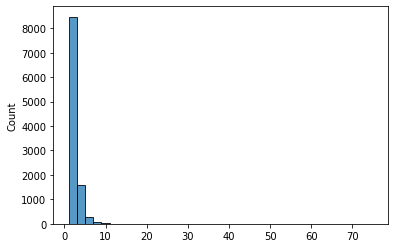

In [652]:
vals, counts = np.unique(nn_lists_idx.ravel(), return_counts=True)
sns.histplot(counts, binwidth=2);

Let's get the accuracy of this solution:

In [653]:
accuracy_score(y.iloc[idx_ts], y_pred)

0.5899122807017544

Depending on the train-test split, the new classifier may have better performance (as it did in this case), or similar performance to the first classifier.

But conceptually, it is more sound, and less "fragile" - less sensitive to the draw of training data.

### Using K-fold CV to select the number of neighbors

As a next step, to improve the classifier performance, we can use K-fold CV to select the number of neighbors. Note that we do not have to re-compute the distances inside each iteration of the loop, we can use pre-computed distances, so this is much faster than you might expect!

In [654]:
# pre-compute a distance matrix of training vs. training data
distances_kfold = np.zeros(shape=(len(idx_tr), len(idx_tr)))

for idx in tqdm(range(len(idx_tr)),  total=len(idx_tr), desc="Distance matrix"):
  distances_kfold[idx] = custom_distance(X.iloc[idx_tr[idx]], X.iloc[idx_tr])

Distance matrix: 100%|██████████| 15958/15958 [00:34<00:00, 461.99it/s]


In [655]:
from sklearn.model_selection import KFold

n_fold = 5
k_list = np.arange(1, 301, 10)
n_k = len(k_list)
acc_list = np.zeros((n_k, n_fold))

kf = KFold(n_splits=5)

print(kf)

for isplit, idx_k in enumerate(kf.split(idx_tr)):

  print("Iteration %d" % isplit)

  # Outer loop: select training vs. validation data (out of training data!)
  idx_tr_k, idx_val_k = idx_k 

  # get target variable values for validation data
  y_val_kfold = y.iloc[idx_tr[idx_val_k]]

  # get distance matrix for validation set vs. training set
  distances_val_kfold   = distances_kfold[idx_val_k[:, None], idx_tr_k]

  # generate a random matrix for tie breaking
  r_matrix = np.random.random(size=(distances_val_kfold.shape))

  # loop over the rows of the distance matrix and the random matrix together with zip
  # for each pair of rows, return sorted indices from distances_val_kfold
  distances_sorted = np.array([np.lexsort((r, row)) for r, row in zip(r_matrix,distances_val_kfold)])

  # Inner loop: select value of K, number of neighbors
  for idx_k, k in enumerate(k_list):

    # now we select the indices of the K smallest, for different values of K
    # the indices in  distances_sorted are with respect to distances_val_kfold
    # from those - get indices in idx_tr_k, then in X
    nn_lists_idx = idx_tr[idx_tr_k[distances_sorted[:,:k]]]

    # get validation accuracy for this value of k
    y_pred =  [y.iloc[nn].mode()[0] for nn in nn_lists_idx]
    acc_list[idx_k, isplit] = accuracy_score(y_val_kfold, y_pred)

KFold(n_splits=5, random_state=None, shuffle=False)
Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4


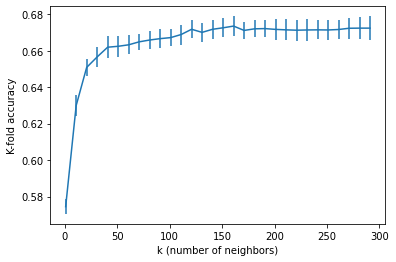

In [656]:
plt.errorbar(x=k_list, y=acc_list.mean(axis=1), yerr=acc_list.std(axis=1)/np.sqrt(n_fold-1));

plt.xlabel("k (number of neighbors)");
plt.ylabel("K-fold accuracy");

Using this, we can find a better choice for K.

In [657]:
best_k = k_list[np.argmax(acc_list.mean(axis=1))]
print(best_k)

161


And compute the accuracy of the overall classifier on the test data, using this K.

In [658]:
r_matrix = np.random.random(size=(distances_custom.shape))
nn_lists = np.array([np.lexsort((r, row))[:best_k] for r, row in zip(r_matrix,distances_custom)])
nn_lists_idx = idx_tr[nn_lists]
y_pred =  [y.iloc[nn].mode()[0] for nn in nn_lists_idx]

In [659]:
accuracy_score(y.iloc[idx_ts], y_pred)

0.6733918128654971

## Improve on the basic classifier

In the sections above, I showed you how to use a K nearest neighbors classifier to predict the vote of a test sample based on three features: race,  education, and age.

For this assignment, you will try to improve the performance of your classifier in three ways:

* by adding more features
* by improving the distance metric
* by using feature selection or feature weights

You can be creative in selecting your approach to each of these three - there isn't one right answer! But, you'll have to explain and justify your decisions.


### Use more features

First, you will improve the model by additional features that you think may be relevant. 

But, do *not* use questions that directly ask the participants how they feel about individual candidates, or about their party affiliation or political leaning.

Your choices for additional features include:

* More demographic information: `INCOME16GEN`, `MARRIED`, `RELIGN10`, `ATTEND16`, `LGBT`, `VETVOTER`
* Opinions about political issues and about what factors are most important in determining which candidate to vote for: `TRACK`, `SUPREME16`,  `FINSIT`, `IMMWALL`, `ISIS16`, `LIFE`, `TRADE16`, `HEALTHCARE16`, `GOVTDO10`, `GOVTANGR16`, `QLT16`, `ISSUE16`, `NEC`

Refer to the PDF documentation to see the question and the possible answers corresponding to each of these features.  You may also choose to do some exploratory data analysis, to help you understand these features better.



For your convenience, here are all the possible answers to those survey questions:

In [660]:
features = ['INCOME16GEN', 'MARRIED', 'RELIGN10', 'ATTEND16', 'LGBT', 'VETVOTER', 
            'TRACK', 'SUPREME16',  'FINSIT', 'IMMWALL', 'ISIS16', 'LIFE', 
            'TRADE16', 'HEALTHCARE16', 'GOVTDO10', 'GOVTANGR16', 'QLT16', 
            'ISSUE16', 'NEC'] #we are also allowed age, education, race sex

for f in features:
  print(f)
  print(df[f].value_counts())
  print("***************************************************")

INCOME16GEN
$50,000-$99,999      2606
$100,000-$199,999    2015
$30,000-$49,999      1586
Under $30,000        1385
$250,000 or more      495
$200.000-$249,999     350
Name: INCOME16GEN, dtype: int64
***************************************************
MARRIED
Yes    5182
No     3611
Name: MARRIED, dtype: int64
***************************************************
RELIGN10
Other christian    1996
Catholic           1792
Protestant         1784
None               1137
Other               577
Jewish              196
Mormon              114
Muslim               71
Name: RELIGN10, dtype: int64
***************************************************
ATTEND16
Once a week or more    1411
A few times a year     1206
Never                   916
A few times a month     697
Name: ATTEND16, dtype: int64
***************************************************
LGBT
No     4007
Yes     194
Name: LGBT, dtype: int64
***************************************************
VETVOTER
No     3673
Yes     562
Name: VETVOTE

It is up to you to decide which features to include in your model. However, you must include

* at least four features that are encoded using an ordinal encoder (and you should include an explicit mapping for these), and 
* at least four features that are encoded using one-hot encoding.

(If you decide to use the features I used above, they do "count" as part of the four. For example, you can use age, education, and two additional ordinal-encoded features, and race and three other one-hot-encoded features.)

#### To Do 1: Encode ordinal features

In the following cells, prepare your ordinal-encoded features as demonstrated in the "Encode ordinal features" section earlier in this notebook. 

Use at least four features that are encoded using an ordinal encoder. (You can choose which features to include, but they should be features for which the values have a logical ordering that should be preserved in the distance computations!)

Make sure to explicitly specify the mappings for these, so that you can be sure that they are encoded using the correct logical order, and use other "best practices" described in that section where applicable.

Save the ordinal-encoded columnns in a data frame called `df_enc_ord`.

In [661]:
# TODO 1 - Encode at least four ordinal features

In [662]:
fourfeatures = ['NEC', 'EDUC12R', 'INCOME16GEN', 'TRADE16']

enc_ord_four = ce.OrdinalEncoder(handle_missing='return_nan')
enc_ord_four.fit(df[fourfeatures])

OrdinalEncoder(cols=['NEC', 'EDUC12R', 'INCOME16GEN', 'TRADE16'],
               drop_invariant=False, handle_missing='return_nan',
               handle_unknown='value',
               mapping=[{'col': 'NEC', 'data_type': dtype('O'),
                         'mapping': NaN           -2
Poor           2
Not so good    3
Good           4
Excellent      5
Omit           6
dtype: int64},
                        {'col': 'EDUC12R', 'data_type': dtype('O'),
                         'mapping': Some college/assoc. degree    1
College graduate              2
Postgraduate study...
High school or less           4
NaN                          -2
dtype: int64},
                        {'col': 'INCOME16GEN', 'data_type': dtype('O'),
                         'mapping': Under $30,000        1
$30,000-$49,999      2
$50,000-$99,999      3
$100,000-$199,999    4
NaN                 -2
$200.000-$249,999    6
$250,000 or more     7
dtype: int64},
                        {'col': 'TRADE16', 'data_type': dty

In [666]:
#mapping_dict = {'col': 'AGE', 'mapping': 
                #{'18-29': 1, 
                 #'30-44': 2,
                 #'45-65': 3,
                 #'65+': 4}
                #}
mapping_dict = {'col': 'NEC', 'mapping': 
                {'Not so good': 1, 
                 'Good': 2,
                 'Poor': 3,
                 'Excellent': 4,
                 'Omit': -1}
                }, {'col': 'EDUC12R', 'mapping':  
                  {'High school or less': 1,
                   'Some college/assoc. degree': 2,
                   'College graduate': 3,
                   'Postgraduate study': 4}
                    }, {'col': 'INCOME16GEN', 'mapping':  
                  {'Under $30,000': 1,
                   '$30,000-$49,999': 2,
                   '$50,000-$99,999': 3,
                   '$100,000-$199,999': 4,
                   '$200.000-$249,999': 5,
                   '$250,000 or more': 6}
                    }, {'col': 'TRADE16', 'mapping':  
                  {'Takes away U.S. jobs': 1,
                   'Creates more U.S. jobs': 2,
                   'Has no effect on U.S. jobs': 3,
                   'Omit': -1}
                    }

fourfeatures = ['TRADE16', 'INCOME16GEN', 'EDUC12R', 'NEC']

enc_ord_four = ce.OrdinalEncoder(handle_missing='return_nan', mapping=mapping_dict)
enc_ord_four.fit(df[fourfeatures])

OrdinalEncoder(cols=['TRADE16', 'INCOME16GEN', 'EDUC12R', 'NEC'],
               drop_invariant=False, handle_missing='return_nan',
               handle_unknown='value',
               mapping=({'col': 'NEC',
                         'mapping': {'Excellent': 4, 'Good': 2,
                                     'Not so good': 1, 'Omit': -1, 'Poor': 3}},
                        {'col': 'EDUC12R',
                         'mapping': {'College graduate': 3,
                                     'High school or less': 1,
                                     'Postgraduate study': 4,
                                     'Some college/assoc. degree': 2}},
                        {'col': 'INCOME16GEN',
                         'mapping': {'$100,000-$199,999': 4,
                                     '$200.000-$249,999': 5,
                                     '$250,000 or more': 6,
                                     '$30,000-$49,999': 2, '$50,000-$99,999': 3,
                                    

Once you are finished processing the ordinal-encoded columns, print the names of the columns, and use `describe` to check the count of each column. Make sure that the range of each column is 0-1. Also make sure that missing values and "Omit" values are recorded as NaN.

In [667]:
df_enc_ord = enc_ord_four.transform(df[fourfeatures])
df_enc_ord.replace(-1, float("NaN"), inplace=True)
df_enc_ord.isna().sum()

TRADE16        18570
INCOME16GEN    14361
EDUC12R         1000
NEC            18350
dtype: int64

In [668]:
for col in df_enc_ord.columns:
  df_enc_ord[col] = df_enc_ord[col]-df_enc_ord[col].min(skipna=True)
  df_enc_ord[col] = df_enc_ord[col]/df_enc_ord[col].max(skipna=True)

In [669]:
df_enc_ord.columns

Index(['TRADE16', 'INCOME16GEN', 'EDUC12R', 'NEC'], dtype='object')

In [670]:
df_enc_ord.describe(include='all')

,TRADE16,INCOME16GEN,EDUC12R,NEC
count,4228.000000,8437.000000,21798.000000,4448.000000
mean,0.326395,0.396302,0.502202,0.280800
std,0.335247,0.266629,0.329376,0.285248
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.200000,0.333333,0.000000
50%,0.500000,0.400000,0.333333,0.333333
75%,0.500000,0.600000,0.666667,0.333333
max,1.000000,1.000000,1.000000,1.000000


#### To Do 2: Encode categorical features



In the following cells, prepare the features that should be one-hot encoded, as demonstrated in the "Encode categorical features" section earlier in this notebook.  Make sure to use any "best practices" described in that section where applicable.

Use at least four features that are encoded using a one-hot encoder. (You can choose which features to include, but they should be features for which the values have *no* logical ordering.)

Save the ordinal-encoded columnns in `df_enc_oh`.

In [766]:
# TODO 2 - encode at least four one-hot-encoded features

In [767]:
four_enc_oh = ce.OneHotEncoder(use_cat_names=True, handle_missing='return_nan')
four_enc_features = ['RACE', 'RELIGN10', 'VETVOTER', 'ISSUE16']
four_enc_oh.fit(df[four_enc_features])

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


OneHotEncoder(cols=['RACE', 'RELIGN10', 'VETVOTER', 'ISSUE16'],
              drop_invariant=False, handle_missing='return_nan',
              handle_unknown='value', return_df=True, use_cat_names=True,
              verbose=0)

In [768]:
df_enc_oh = four_enc_oh.transform(df[four_enc_features])
df_enc_oh

,RACE_Hispanic/Latino,RACE_Asian,RACE_Other,RACE_Black,RACE_White,RACE_nan,RELIGN10_nan,RELIGN10_Protestant,RELIGN10_None,RELIGN10_Other christian,RELIGN10_Catholic,RELIGN10_Jewish,RELIGN10_Other,RELIGN10_Muslim,RELIGN10_Mormon,VETVOTER_nan,VETVOTER_No,VETVOTER_Yes,ISSUE16_Foreign policy,ISSUE16_The economy,ISSUE16_Terrorism,ISSUE16_Immigration,ISSUE16_Omit,ISSUE16_nan
0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22793,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0
22794,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0
22795,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
22796,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0


Print the columns of your one-hot encoded features. Make sure you have dropped the columns corresponding with NaN and "Omit" in the title, which should not be included in the distance computations. (You should already represent NaNs directly in the data.)

In [769]:
df_enc_oh.isnull().sum()

RACE_Hispanic/Latino          310
RACE_Asian                    310
RACE_Other                    310
RACE_Black                    310
RACE_White                    310
RACE_nan                      310
RELIGN10_nan                15131
RELIGN10_Protestant         15131
RELIGN10_None               15131
RELIGN10_Other christian    15131
RELIGN10_Catholic           15131
RELIGN10_Jewish             15131
RELIGN10_Other              15131
RELIGN10_Muslim             15131
RELIGN10_Mormon             15131
VETVOTER_nan                18563
VETVOTER_No                 18563
VETVOTER_Yes                18563
ISSUE16_Foreign policy      13809
ISSUE16_The economy         13809
ISSUE16_Terrorism           13809
ISSUE16_Immigration         13809
ISSUE16_Omit                13809
ISSUE16_nan                 13809
dtype: int64

In [770]:
columns_to_drop = ['RACE_nan', 'RELIGN10_nan', 'VETVOTER_nan', 'ISSUE16_Omit', 'ISSUE16_nan']
df_enc_oh.drop(columns_to_drop, axis=1, inplace=True)

In [771]:
df_enc_oh.isnull().sum()

RACE_Hispanic/Latino          310
RACE_Asian                    310
RACE_Other                    310
RACE_Black                    310
RACE_White                    310
RELIGN10_Protestant         15131
RELIGN10_None               15131
RELIGN10_Other christian    15131
RELIGN10_Catholic           15131
RELIGN10_Jewish             15131
RELIGN10_Other              15131
RELIGN10_Muslim             15131
RELIGN10_Mormon             15131
VETVOTER_No                 18563
VETVOTER_Yes                18563
ISSUE16_Foreign policy      13809
ISSUE16_The economy         13809
ISSUE16_Terrorism           13809
ISSUE16_Immigration         13809
dtype: int64

In [772]:
df_enc_oh.describe(include='all')

,RACE_Hispanic/Latino,RACE_Asian,RACE_Other,RACE_Black,RACE_White,RELIGN10_Protestant,RELIGN10_None,RELIGN10_Other christian,RELIGN10_Catholic,RELIGN10_Jewish,RELIGN10_Other,RELIGN10_Muslim,RELIGN10_Mormon,VETVOTER_No,VETVOTER_Yes,ISSUE16_Foreign policy,ISSUE16_The economy,ISSUE16_Terrorism,ISSUE16_Immigration
count,22488.000000,22488.000000,22488.000000,22488.000000,22488.000000,7667.000000,7667.000000,7667.000000,7667.000000,7667.000000,7667.000000,7667.000000,7667.000000,4235.000000,4235.000000,8989.000000,8989.000000,8989.000000,8989.000000
mean,0.098275,0.030505,0.030283,0.133093,0.707844,0.232686,0.148298,0.260337,0.233729,0.025564,0.075258,0.009260,0.014869,0.867296,0.132704,0.123596,0.537546,0.183224,0.116921
std,0.297692,0.171976,0.171368,0.339683,0.454764,0.422571,0.355418,0.438847,0.423229,0.157841,0.263824,0.095791,0.121036,0.339294,0.339294,0.329138,0.498616,0.386872,0.321344
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Create a combined data matrix

In [773]:
X = pd.concat([df_enc_oh, df_enc_ord], axis=1)

In [807]:
X.describe(include='all')

,RACE_Hispanic/Latino,RACE_Asian,RACE_Other,RACE_Black,RACE_White,RELIGN10_Protestant,RELIGN10_None,RELIGN10_Other christian,RELIGN10_Catholic,RELIGN10_Jewish,RELIGN10_Other,RELIGN10_Muslim,RELIGN10_Mormon,VETVOTER_No,VETVOTER_Yes,ISSUE16_Foreign policy,ISSUE16_The economy,ISSUE16_Terrorism,ISSUE16_Immigration,TRADE16,INCOME16GEN,EDUC12R,NEC
count,22488.000000,22488.000000,22488.000000,22488.000000,22488.000000,7667.000000,7667.000000,7667.000000,7667.000000,7667.000000,7667.000000,7667.000000,7667.000000,4235.000000,4235.000000,8989.000000,8989.000000,8989.000000,8989.000000,4228.000000,8437.000000,21798.000000,4448.000000
mean,0.098275,0.030505,0.030283,0.133093,0.707844,0.232686,0.148298,0.260337,0.233729,0.025564,0.075258,0.009260,0.014869,0.867296,0.132704,0.123596,0.537546,0.183224,0.116921,0.326395,0.396302,0.502202,0.280800
std,0.297692,0.171976,0.171368,0.339683,0.454764,0.422571,0.355418,0.438847,0.423229,0.157841,0.263824,0.095791,0.121036,0.339294,0.339294,0.329138,0.498616,0.386872,0.321344,0.335247,0.266629,0.329376,0.285248
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.333333,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.500000,0.400000,0.333333,0.333333
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.500000,0.600000,0.666667,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### To Do 3: Describe your choice of features


In a text cell, explain the features you have chosen to add to the model. 

* Why did you select this particular set of features? 
* Do you have reason to believe these specific features will be predictive of 2016 presidential vote? Explain.
* Do you think these features will give you good "coverage" across the respondents? (For example, do you have at least one feature from each version of the survey?)

### Design a custom distance metric

Next, you should improve on the basic distance metric we used above. You can design any distance metric you think is appropriate (there is no one right answer to this question)!, but it must meet these criteria:

* it should handle NaN values in a reasonable way. Remember that a NaN does not mean two samples are *different* with respect to a feature; it means you don't have any information about whether they agree or disagree.
* samples should be considered closer if they have more features in common (assuming the same number of features that disagree).
* **optional**: you may decide that in some cases, samples with many features in common but a few small disagreements, should be considered closer than samples with few features in common but no disagreements.


![](https://raw.githubusercontent.com/ffund/ml-notebooks/master/notebooks/images/exit-poll-nan-distance.png)

For example, consider the image above, with a test sample (with bold outline) and three training samples. Red squares indicate missing values.

Training sample $x_1$ and training sample $x_2$ both have no disagreements with the test sample $x_t$. According to our basic L1 distance metric, they should both have 0 distance. However, in your modified metric, training sample $x_2$ should be considered closer to the test sample $x_t$, because it has more features in common.

Training sample $x_3$ has many features in common with the test sample $x_t$, but also one disagreement. You can decide which should be considered a closer neighbor of $x_t$: $x_1$ or $x_3$. But, you should explain your choice and justify your decision in the explanation.

#### To Do 4: Implement a custom distance metric

In [775]:
def custom_distance_metric(a, b):
  a = np.nan_to_num(a, nan=.5)
  b = np.nan_to_num(b, nan=.5)
  dif = np.abs(np.subtract(a,b))    # element-wise absolute difference
  result = np.sum(dif, axis=1)  # sum of differences, treating NaN as 0
  return result

In [776]:
#ph_tr, ph_ts = next(ShuffleSplit(n_splits = 1, test_size = 0.3, random_state = 3).split(df['TRACK']))
ph_tr, ph_ts = next(ShuffleSplit(n_splits = 1, test_size = 0.3, random_state = 3).split(X))

In [777]:
phdistances_custom = np.zeros(shape=(len(ph_ts), len(ph_tr)))
phdistances_custom.shape

(6840, 15958)

In [778]:
# the first argument to tqdm, range(len(a_idx)), is the list we are looping over
for idx in tqdm(range(len(ph_ts)),  total=len(ph_ts), desc="Distance matrix"):
  phdistances_custom[idx] = custom_distance_metric(X.iloc[ph_ts[idx]], X.iloc[ph_tr])

Distance matrix: 100%|██████████| 6840/6840 [01:07<00:00, 101.32it/s]


In [779]:
np.set_printoptions(precision=2) # show at most 2 decimal places
print(phdistances_custom)

[[4.37 8.77 6.1  ... 8.6  4.93 8.43]
 [3.43 8.3  5.63 ... 9.47 5.13 6.63]
 [3.43 8.3  5.63 ... 9.47 5.13 6.63]
 ...
 [3.63 8.5  5.83 ... 9.67 5.33 6.83]
 [3.47 5.67 1.   ... 5.5  1.83 7.33]
 [3.93 8.8  6.13 ... 9.97 5.63 9.13]]


In [780]:
#number of agreements - distance decrease
#number of features where both are non nan - distance decrease
#number of features where both are nan - distance decrease
#number of disagreements - distance increase
#number of features where one is nan - distance icrease

#### To Do 5: Describe your distance metric and justify your design choices

Describe your distance metric. First, write down an exact expression for 

$$d(a, b) $$

Explain *why* you chose this function, and how it satisfies the criteria above.

Use several *specific examples* from the data to show how your distance function produces more meaningful distances than the previous "naive" distance metric. Compare and contrast the previous "naive" distance metric and your new distance metric on these examples.

---
The previous 'naive' distance metric treated an omission or lack-of-a-response as a zero. Some binary decisions, like an individual's preferred candidate, was also encoded as a binary decision with a 'zero' or a 'one' representing a candidate. Even for non-binary decisions, such as age or income, some answers were still encoded in an ordered fashion where the low-answer was encoded as a zero. Therefore, the 'naive' distance metric treated an omission, in some circumstances,as indentical to an affirmative answer.  

The proposed distance metric is, argurably, the optimal solution for binary features. For example, an individual's preferred candidate, a non-responsive answer is not treated as .5; an ambivalent middle point between Hillary (treated as a 0) or a Trump (treated a 1); we do not know how a non-responsive person would answer; they could answer Hillary or Trump; now they are treated as equal-distance between Hillary and Trump. Previously, under the 'naive' distance metric they were treated as a Hillary supporter despite the non-responsive answer. Therefore, the proposed method attempts to strike a middle ground.

However, the proposed distance metric is troublesome for non-binary features. For example, a non-responsive person's age is treated as 

----

### Use feature selection or feature weights for better performance

Because the K nearest neighbor classifier weights each feature equally in the distance metric, including features that are not relevant for predicting the target variable can actually make performance worse.

To improve performance, you could either:

* use a subset of features that are most important, or
* use feature weights, so that more important features are scaled up and less important features are scaled down.

Feature selection has another added benefit - if you use fewer features, than you also get a faster inference time.

There are a few general approaches to feature selection:

* **Wrapper methods** use the ML model on the data, and  select relevant features based the model performance. (For example, we might train a linear regression on different combinations of features, and then select the one that has the best performance on a validation set.)
* **Filter methods** use statistical characteristics of the data to select the features that are more useful for predicting the target variable. (For example, we might select the features that have the highest correlation with the target variable.)
* **Embedded methods** do feature selection "automatically" as part of the model training. (LASSO is an example of this type of feature selection.)

We also need to decide whether we want to take the dependencies between features into account, or not.

With **univariate feature selection**, we consider each feature independently. For example, we might score each feature according to its correlation with the target variable, then pick the features with the highest scores. 

The problem with univariate feature selection is that some features may carry redundant information. In that case, we don't gain much from having both features in our model, but both will have similar scores.

As an alternative to univariate feature selection, we might consider **greedy feature selection**, where we start with a small number of features and then add features one at a time:

* Let $S^{t-1}$ be the set of selected features at time ${t-1}$.
* Compute the score for all combinations of the current set of features + one more feature
* For the next time step $S^t$, add the feature that gave you the best score.
* Stop when you have added all features, or if adding another feature decreases the score.

Feature weighting does not have the benefit of faster inference time, but it does have the advantage of not throwing out useful information.

As with feature selection, there are both wrapper methods and filter methods, but filter methods tend to be much easier to compute.

There are many options for feature selection or feature weighting, and you can choose anything that seems reasonable to you - there isn't one right answer here! But, you will have to explain and justify your choice. For full credit, your design decisions should be well supported by the data.

#### To Do 6: Implement feature selection or feature weighting

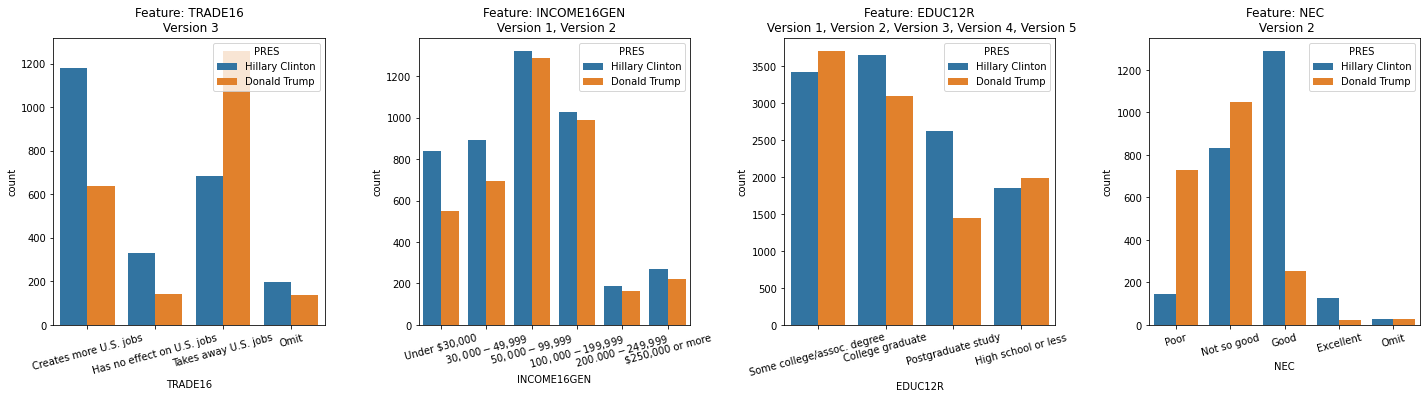

In [781]:
fig = plt.figure(figsize=(25,25))

for idx, f in enumerate (fourfeatures):
    ax = fig.add_subplot(5,5,idx+1)
    versions = df[[f, 'VERSION']].dropna()['VERSION'].unique()
    sns.countplot(data=df, x=f, hue='PRES', ax=ax)
    ax.set_title(f)
    plt.xticks(rotation=15)
    plt.title("Feature: %s\n %s" % (f, np.str.join(', ', versions)))

plt.tight_layout()
plt.show()

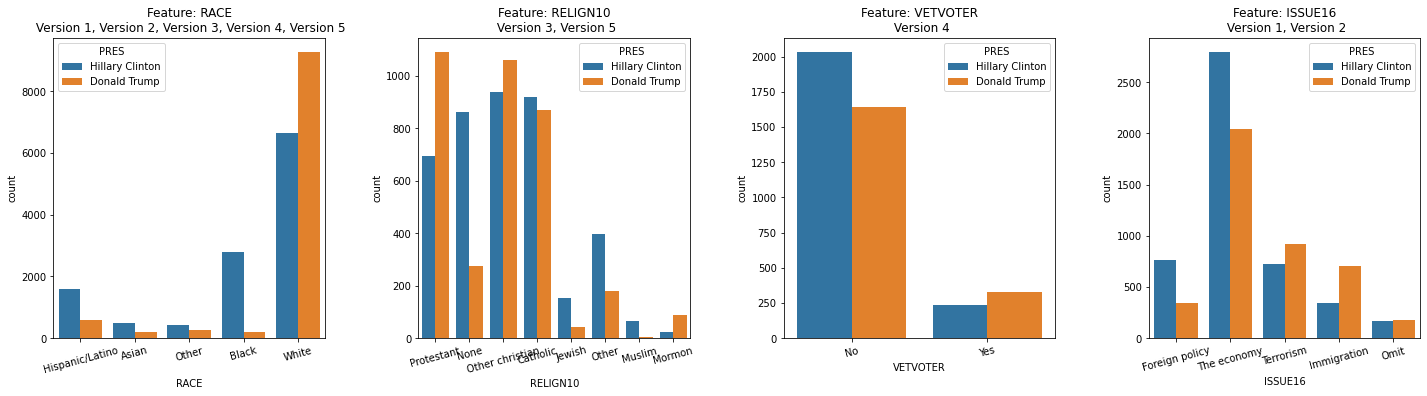

In [782]:
fig = plt.figure(figsize=(25,25))

for idx, f in enumerate (four_enc_features):
    ax = fig.add_subplot(5,5,idx+1)
    versions = df[[f, 'VERSION']].dropna()['VERSION'].unique()
    sns.countplot(data=df, x=f, hue='PRES', ax=ax)
    ax.set_title(f)
    plt.xticks(rotation=15)
    plt.title("Feature: %s\n %s" % (f, np.str.join(', ', versions)))

plt.tight_layout()
plt.show()

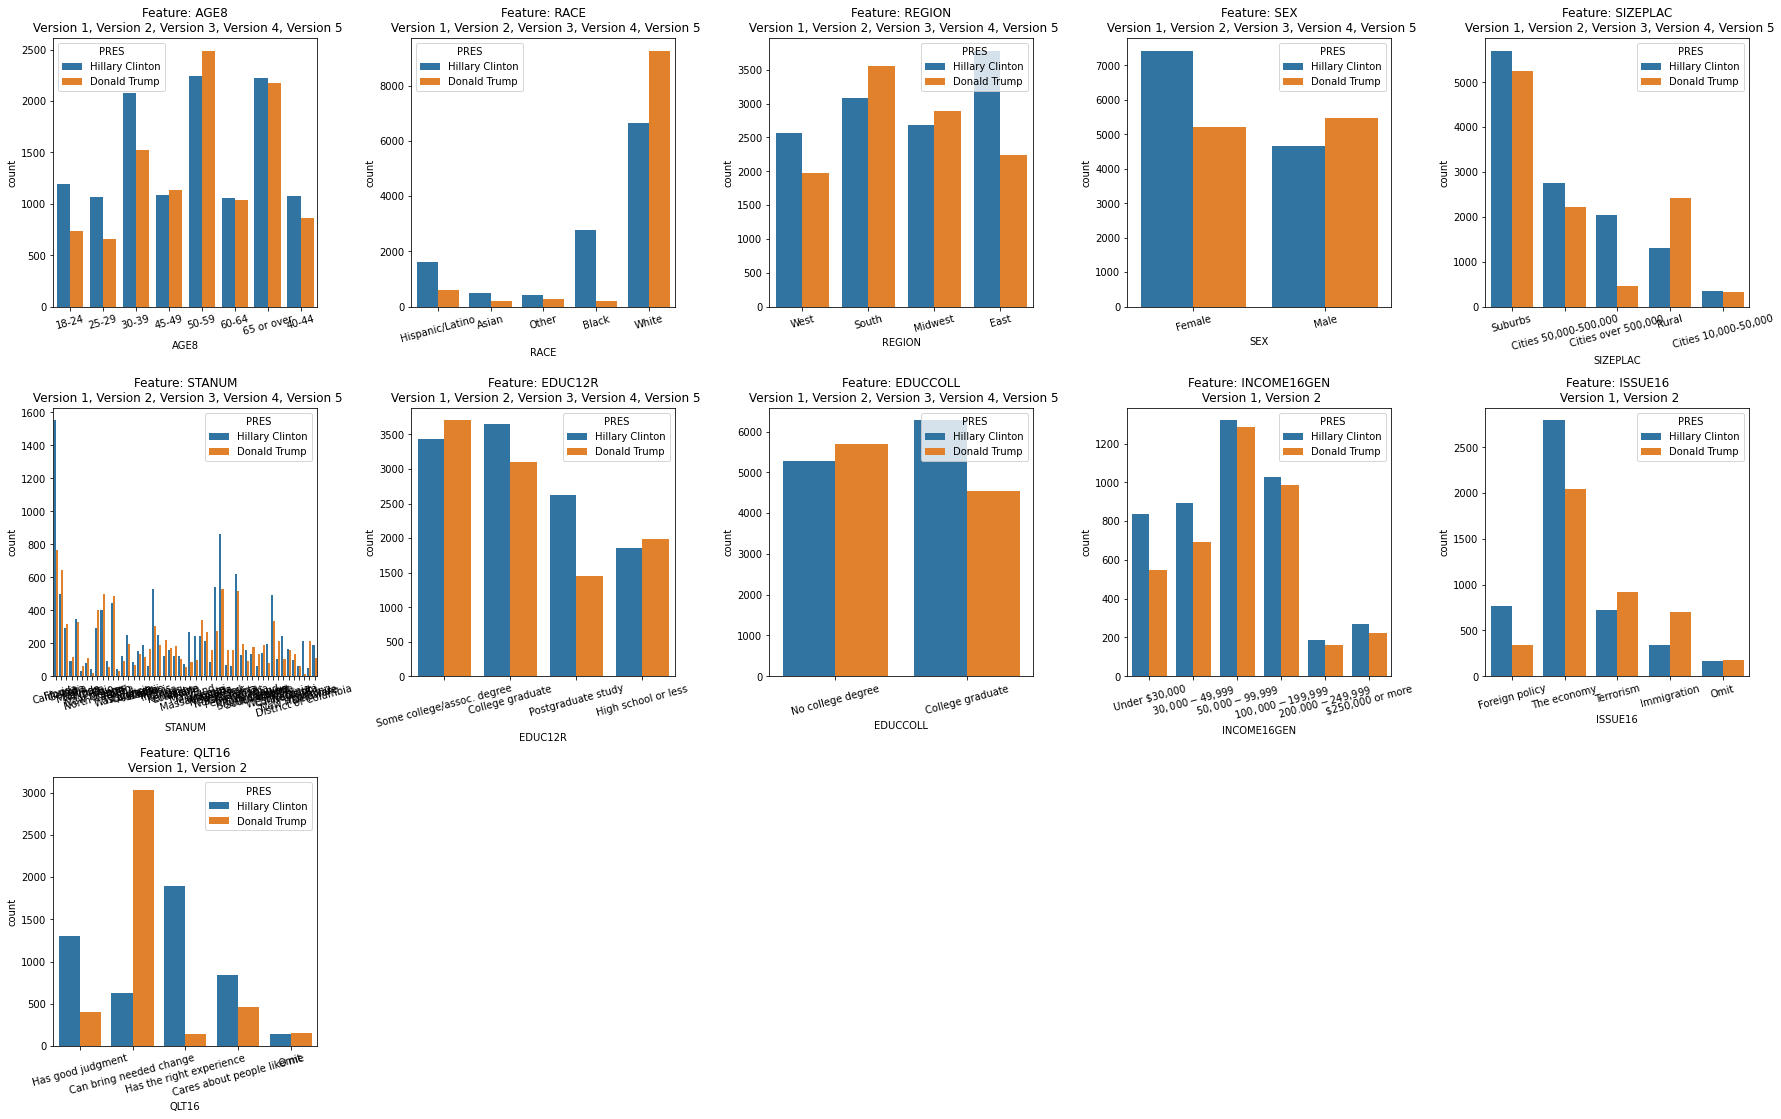

In [783]:
disp_features = ['AGE8', 'RACE', 'REGION', 'SEX', 'SIZEPLAC', 'STANUM', 'EDUC12R', 'EDUCCOLL','INCOME16GEN', 'ISSUE16', 'QLT16']
fig = plt.figure(figsize=(25,25))

for idx, f in enumerate (disp_features):
    ax = fig.add_subplot(5,5,idx+1)
    versions = df[[f, 'VERSION']].dropna()['VERSION'].unique()
    sns.countplot(data=df, x=f, hue='PRES', ax=ax)
    ax.set_title(f)
    plt.xticks(rotation=15)
    plt.title("Feature: %s\n %s" % (f, np.str.join(', ', versions)))

plt.tight_layout()
plt.show()

In [78]:
# columns_to_drop = ['Seriously off on the wrong track', 'Generally going in the right direction ', 'Omit']
# #columns_to_drop = ['EDUC12R', 'INCOME16GEN']
# #columns_to_drop = ['VETVOTER_No']
# X.drop(columns_to_drop, axis=1, inplace=True)

KeyError: "['TRACK_Seriously off on the wrong track'\n 'TRACK_Generally going in the right direction ' 'TRACK16_Omit'] not found in axis"

In [810]:
X_trans = X

In [812]:
X_trans.describe(include='all')

,RACE_Hispanic/Latino,RACE_Asian,RACE_Other,RACE_Black,RACE_White,RELIGN10_Protestant,RELIGN10_None,RELIGN10_Other christian,RELIGN10_Catholic,RELIGN10_Jewish,RELIGN10_Other,RELIGN10_Muslim,RELIGN10_Mormon,ISSUE16_Foreign policy,ISSUE16_The economy,ISSUE16_Terrorism,ISSUE16_Immigration,TRADE16,INCOME16GEN,EDUC12R,NEC
count,22488.000000,22488.000000,22488.000000,22488.000000,22488.000000,7667.000000,7667.000000,7667.000000,7667.000000,7667.000000,7667.000000,7667.000000,7667.000000,8989.000000,8989.000000,8989.000000,8989.000000,4228.000000,8437.000000,21798.000000,4448.000000
mean,0.098275,0.030505,0.030283,0.133093,0.707844,0.232686,0.148298,0.260337,0.233729,0.025564,0.075258,0.009260,0.014869,0.123596,0.537546,0.183224,0.116921,0.326395,0.396302,0.502202,0.280800
std,0.297692,0.171976,0.171368,0.339683,0.454764,0.422571,0.355418,0.438847,0.423229,0.157841,0.263824,0.095791,0.121036,0.329138,0.498616,0.386872,0.321344,0.335247,0.266629,0.329376,0.285248
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.333333,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.500000,0.400000,0.333333,0.333333
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.500000,0.600000,0.666667,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [813]:
# TODO 6 - use either feature selection or feature weighting. 
# save the result in X_trans. 
# For the rest of this notebook, you will use X_trans instead of X
# X_trans = 

#### To Do 7: Describe your feature selection/weighting and justify your design choices

Explain your approach to feature selection or feature weighting. What did you do in this section? Why do you think this was a good choice for this problem? 

For full credit, you must show that your design decisions are supported by the data.

Were the results of the feature selection of feature weighting procedure surprising or unexpected in any way?



###  Evaluate your final classifier

Finally, train a K nearest neighbors classifier, using the approach shown earlier in this notebook, but with:

* your custom distance metric
* your feature matrix with additional ordinal-encoded and one-hot-encoded features, and the results of your feature selection or feature weighting



In [814]:
#ph_tr, ph_ts = next(ShuffleSplit(n_splits = 1, test_size = 0.3, random_state = 3).split(df['TRACK']))
ph_tr, ph_ts = next(ShuffleSplit(n_splits = 1, test_size = 0.3, random_state = 3).split(X_trans))

In [815]:
phdistances_custom = np.zeros(shape=(len(ph_ts), len(ph_tr)))
phdistances_custom.shape

(6840, 15958)

In [816]:
# the first argument to tqdm, range(len(a_idx)), is the list we are looping over
for idx in tqdm(range(len(ph_tr)),  total=len(ph_tr), desc="Distance matrix"):
  phdistances_custom[idx] = custom_distance_metric(X.iloc[idx]], X.iloc[idx])

Distance matrix: 100%|██████████| 6840/6840 [01:00<00:00, 112.35it/s]


In [817]:
print(phdistances_custom)

[[4.37 8.77 5.1  ... 8.6  4.93 8.43]
 [3.43 8.3  4.63 ... 9.47 5.13 6.63]
 [3.43 8.3  4.63 ... 9.47 5.13 6.63]
 ...
 [3.63 8.5  4.83 ... 9.67 5.33 6.83]
 [2.47 4.67 1.   ... 4.5  0.83 6.33]
 [3.93 8.8  5.13 ... 9.97 5.63 9.13]]


In [818]:
phdistances_custom = np.interp(phdistances_custom, (phdistances_custom.min(), phdistances_custom.max()), (0, +1))

In [819]:
print(phdistances_custom)
print(phdistances_custom.shape)

[[0.4  0.8  0.46 ... 0.78 0.45 0.77]
 [0.31 0.75 0.42 ... 0.86 0.47 0.6 ]
 [0.31 0.75 0.42 ... 0.86 0.47 0.6 ]
 ...
 [0.33 0.77 0.44 ... 0.88 0.48 0.62]
 [0.22 0.42 0.09 ... 0.41 0.08 0.58]
 [0.36 0.8  0.47 ... 0.91 0.51 0.83]]
(6840, 15958)


In [820]:
k = 3

# get nn indices in distance matrix
distances_sorted = np.array([np.argsort(row) for row in phdistances_custom]) 
nn_lists = distances_sorted[:, :k]

# get nn indices in training data matrix
nn_lists_idx = ph_tr[nn_lists]

# predict using mode of nns
y_pred =  [y.iloc[nn].mode()[0] for nn in nn_lists_idx]

In [821]:
accuracy_score(y.iloc[ph_ts], y_pred)

0.6662280701754386

#### To Do 8: Select K (number of neighbors) for your final classifier

Once you have made your other design choices, you need to choose the value of K (the number of neighbors. 

For full credit, use cross validation to select K, and plot the mean validation accuracy for each candidate model.

If you can't use cross validation, you will get partial credit for selecting a reasonable value and justifying your choice. 

Make sure *not* to use your test set to determine the best K, since this is part of the training process.

In [822]:
# pre-compute a distance matrix of training vs. training data
distances_kfold = np.zeros(shape=(len(ph_tr), len(ph_tr)))

for idx in tqdm(range(len(ph_tr)),  total=len(ph_tr), desc="Distance matrix"):
  distances_kfold[idx] = custom_distance(X.iloc[idx], X.iloc[idx])

Distance matrix: 100%|██████████| 6840/6840 [00:43<00:00, 157.37it/s]


In [823]:
distances_kfold = np.interp(distances_kfold, (distances_kfold.min(), distances_kfold.max()), (0, +1))

In [824]:
from sklearn.model_selection import KFold

n_fold = 5
k_list = np.arange(1, 301, 10)
n_k = len(k_list)
acc_list = np.zeros((n_k, n_fold))

kf = KFold(n_splits=5)

print(kf)

for isplit, idx_k in enumerate(kf.split(ph_tr)):

  print("Iteration %d" % isplit)

  # Outer loop: select training vs. validation data (out of training data!)
  idx_tr_k, idx_val_k = idx_k 

  # get target variable values for validation data
  y_val_kfold = y.iloc[ph_tr[idx_val_k]]

  # get distance matrix for validation set vs. training set
  distances_val_kfold   = distances_kfold[idx_val_k[:, None], idx_tr_k]

  # generate a random matrix for tie breaking
  r_matrix = np.random.random(size=(distances_val_kfold.shape))

  # loop over the rows of the distance matrix and the random matrix together with zip
  # for each pair of rows, return sorted indices from distances_val_kfold
  distances_sorted = np.array([np.lexsort((r, row)) for r, row in zip(r_matrix,distances_val_kfold)])

  # Inner loop: select value of K, number of neighbors
  for idx_k, k in enumerate(k_list):

    # now we select the indices of the K smallest, for different values of K
    # the indices in  distances_sorted are with respect to distances_val_kfold
    # from those - get indices in idx_tr_k, then in X
    nn_lists_idx = ph_tr[idx_tr_k[distances_sorted[:,:k]]]

    # get validation accuracy for this value of k
    y_pred =  [y.iloc[nn].mode()[0] for nn in nn_lists_idx]
    acc_list[idx_k, isplit] = accuracy_score(y_val_kfold, y_pred)

KFold(n_splits=5, random_state=None, shuffle=False)
Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4


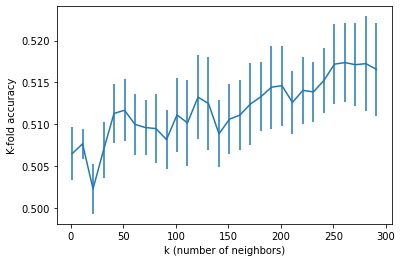

In [825]:
plt.errorbar(x=k_list, y=acc_list.mean(axis=1), yerr=acc_list.std(axis=1)/np.sqrt(n_fold-1));

plt.xlabel("k (number of neighbors)");
plt.ylabel("K-fold accuracy");

In [826]:
best_k = k_list[np.argmax(acc_list.mean(axis=1))]
print(best_k)

261


In [827]:
# TODO 8 - select the number of neighbors

#### To Do 9: Evaluate your final classifier on the test set

Finally, evaluate the classifier accuracy on the test set. Print the test accuracy. Are you able to achieve at least 80% accuracy?

In [828]:
r_matrix = np.random.random(size=(phdistances_custom.shape))
nn_lists = np.array([np.lexsort((r, row))[:best_k] for r, row in zip(r_matrix,phdistances_custom)])
nn_lists_idx = ph_tr[nn_lists]
y_pred =  [y.iloc[nn].mode()[0] for nn in nn_lists_idx]

In [829]:
accuracy_score(y.iloc[ph_ts], y_pred)

0.7049707602339181

In [830]:
# TODO 9 - Evaluate on test set

### To Do 10: Discussion

Discuss the final classifier you developed. Does it perform well? Do you have ideas that you think could make it better? Do you think other models we studied, such as a logistic regression classifier, would be a better choice for this task?

Look at some specific examples where your model does poorly. Do you notice any systematic problems?

In the examples where the model does not predict the correct 2016 vote, is it because the test sample has a different vote than training samples that are generally very similar? Or is it because the nearest neighbors are not really very similar to the test sample? Show specific examples to support your answer.

No features removed. Standardizing distance from 0-1. NaN = 0.5. Accruacy: 75%.
No features removed. Standardizing distance from 0-1. NaN = 1. Accruacy: 74%.
Removing Trade: 75%. Removing RACE: 68%. Removing Quality: 69%.